#GAN - Classifying Hand Written Text

## Importing Libraries

In [1]:
import tensorflow as tensorflow
from tensorflow.keras.preprocessing.image import ImageDataGenerator 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D, Activation,BatchNormalization
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import pandas as pd
import numpy as np
import keras
from keras.layers import Dense, Dropout, Input
from keras.models import Model,Sequential
from keras.datasets import mnist
from tqdm import tqdm
from keras.layers.advanced_activations import LeakyReLU
from tensorflow.keras.optimizers import Adam

## Data Pre-Processing

In [2]:
# Loading the MNIST dataset
mnist = keras.datasets.mnist 
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [3]:
## Checking dimensions of dataset

print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(60000, 28, 28)
(10000, 28, 28)
(60000,)
(10000,)


In [4]:
## Changing dataset to float32
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

In [5]:
# scale from [0,255] to [-1,1]
X_train = (X_train - 127.5) / 127.5

## Reshaping the tranining dataset

X_train = X_train.reshape(60000,784)
print(X_train.shape)

(60000, 784)


In [6]:
# X_train is 60000 rows of 28x28 values; we reshape it to # 60000 x 784. 
def load_data():
    (x_train, y_train), (x_test, y_test) = mnist.load_data()
    x_train = (x_train.astype(np.float32) - 127.5)/127.5
    
    # convert shape of x_train from (60000, 28, 28) to (60000, 784) 
    # 784 columns per row
    x_train = x_train.reshape(60000, 784)
    return (x_train, y_train, x_test, y_test)
(X_train, y_train,X_test, y_test)=load_data()
print(X_train.shape)

(60000, 784)


## Building Basic Model

In [7]:
## Generator

def gen_generator():
  gen = Sequential()
  gen.add(Dense(units = 256,input_dim=100))
  gen.add(LeakyReLU(0.2))
  gen.add(Dense(units=512))
  gen.add(LeakyReLU(0.2))
  gen.add(Dense(units=1024))
  gen.add(LeakyReLU(0.2))
  gen.add(Dense(units=784, activation= 'tanh'))

  gen.compile(loss= 'binary_crossentropy', optimizer = 'adam')
  return gen

generator = gen_generator()
generator.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 256)               25856     
_________________________________________________________________
leaky_re_lu (LeakyReLU)      (None, 256)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               131584    
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 1024)              525312    
_________________________________________________________________
leaky_re_lu_2 (LeakyReLU)    (None, 1024)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 784)               8

In [8]:
## Discriminator

def gen_discriminator():
  dis = Sequential()
  dis.add(Dense(units=1024,input_dim = 784))
  dis.add(LeakyReLU(0.2))
  dis.add(Dropout(0.3))
  dis.add(Dense(units=512))
  dis.add(LeakyReLU(0.2))
  dis.add(Dropout(0.3))
  dis.add(Dense(units=256))
  dis.add(LeakyReLU(0.2))
  dis.add(Dense(units=1, activation= 'sigmoid'))

  dis.compile(loss= 'binary_crossentropy', optimizer= 'adam')
  return dis

discriminator = gen_discriminator()
discriminator.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 1024)              803840    
_________________________________________________________________
leaky_re_lu_3 (LeakyReLU)    (None, 1024)              0         
_________________________________________________________________
dropout (Dropout)            (None, 1024)              0         
_________________________________________________________________
dense_5 (Dense)              (None, 512)               524800    
_________________________________________________________________
leaky_re_lu_4 (LeakyReLU)    (None, 512)               0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 256)              

In [9]:
## Creating GAN Generator

def gen_gan(dis,gen):
  dis.trainnable = False
  gan_input = Input(shape=(100,))
  x = gen(gan_input)
  gan_output = dis(x)
  gan = Model(inputs=gan_input,outputs=gan_output)
  gan.compile(loss='binary_crossentropy', optimizer='adam')
  return gan

gan = gen_gan(discriminator,generator)
gan.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 100)]             0         
_________________________________________________________________
sequential (Sequential)      (None, 784)               1486352   
_________________________________________________________________
sequential_1 (Sequential)    (None, 1)                 1460225   
Total params: 2,946,577
Trainable params: 2,946,577
Non-trainable params: 0
_________________________________________________________________


In [10]:
## Generate visualisation

def gen_plot(epoch,generator,examples=100, dim=(10,10), figsize=(10,10)):
  ## Adding noise
  noise=np.random.normal(loc=0, scale=1, size=[examples, 100])
  ## generating image from noise
  gen_image = generator.predict(noise)
  ## reshaping the image
  gen_image = gen_image.reshape(100,28,28)
  plt.figure(figsize=figsize)
  for i in range(gen_image.shape[0]):
    #plotting image in subplots
    plt.subplot(dim[0], dim[1], i+1)
    plt.imshow(gen_image[i], interpolation='nearest')
    plt.axis('off')
  plt.tight_layout()
  #saving the image
  plt.savefig('gen_generated_image %d.png' %epoch)


For Epoch --> 0


100%|██████████| 128/128 [00:08<00:00, 15.66it/s]


For Epoch --> 1


100%|██████████| 128/128 [00:05<00:00, 21.79it/s]


For Epoch --> 2


100%|██████████| 128/128 [00:06<00:00, 20.34it/s]


For Epoch --> 3


100%|██████████| 128/128 [00:06<00:00, 21.20it/s]


For Epoch --> 4


100%|██████████| 128/128 [00:06<00:00, 20.74it/s]


For Epoch --> 5


100%|██████████| 128/128 [00:06<00:00, 21.31it/s]


For Epoch --> 6


100%|██████████| 128/128 [00:06<00:00, 21.25it/s]


For Epoch --> 7


100%|██████████| 128/128 [00:05<00:00, 21.61it/s]


For Epoch --> 8


100%|██████████| 128/128 [00:05<00:00, 21.58it/s]


For Epoch --> 9


100%|██████████| 128/128 [00:05<00:00, 21.46it/s]


For Epoch --> 10


100%|██████████| 128/128 [00:06<00:00, 21.29it/s]


For Epoch --> 11


100%|██████████| 128/128 [00:05<00:00, 21.44it/s]


For Epoch --> 12


100%|██████████| 128/128 [00:05<00:00, 21.46it/s]


For Epoch --> 13


100%|██████████| 128/128 [00:05<00:00, 21.48it/s]


For Epoch --> 14


100%|██████████| 128/128 [00:06<00:00, 20.24it/s]


For Epoch --> 15


100%|██████████| 128/128 [00:05<00:00, 21.36it/s]


For Epoch --> 16


100%|██████████| 128/128 [00:05<00:00, 21.49it/s]


For Epoch --> 17


100%|██████████| 128/128 [00:05<00:00, 21.37it/s]


For Epoch --> 18


100%|██████████| 128/128 [00:05<00:00, 21.67it/s]


For Epoch --> 19


100%|██████████| 128/128 [00:05<00:00, 21.63it/s]


For Epoch --> 20


100%|██████████| 128/128 [00:05<00:00, 21.65it/s]


For Epoch --> 21


100%|██████████| 128/128 [00:05<00:00, 21.62it/s]


For Epoch --> 22


100%|██████████| 128/128 [00:05<00:00, 21.34it/s]


For Epoch --> 23


100%|██████████| 128/128 [00:05<00:00, 21.48it/s]


For Epoch --> 24


100%|██████████| 128/128 [00:05<00:00, 21.46it/s]


For Epoch --> 25


100%|██████████| 128/128 [00:05<00:00, 21.44it/s]


For Epoch --> 26


100%|██████████| 128/128 [00:05<00:00, 21.48it/s]


For Epoch --> 27


100%|██████████| 128/128 [00:06<00:00, 21.31it/s]


For Epoch --> 28


100%|██████████| 128/128 [00:06<00:00, 20.18it/s]


For Epoch --> 29


100%|██████████| 128/128 [00:05<00:00, 21.44it/s]


For Epoch --> 30


100%|██████████| 128/128 [00:06<00:00, 21.17it/s]


For Epoch --> 31


100%|██████████| 128/128 [00:06<00:00, 21.11it/s]


For Epoch --> 32


100%|██████████| 128/128 [00:05<00:00, 21.46it/s]


For Epoch --> 33


100%|██████████| 128/128 [00:05<00:00, 21.39it/s]


For Epoch --> 34


100%|██████████| 128/128 [00:05<00:00, 21.47it/s]


For Epoch --> 35


100%|██████████| 128/128 [00:06<00:00, 21.20it/s]


For Epoch --> 36


100%|██████████| 128/128 [00:05<00:00, 21.34it/s]


For Epoch --> 37


100%|██████████| 128/128 [00:06<00:00, 21.23it/s]


For Epoch --> 38


100%|██████████| 128/128 [00:06<00:00, 21.22it/s]


For Epoch --> 39


100%|██████████| 128/128 [00:05<00:00, 21.44it/s]


For Epoch --> 40


100%|██████████| 128/128 [00:06<00:00, 21.30it/s]


For Epoch --> 41


100%|██████████| 128/128 [00:05<00:00, 21.38it/s]


For Epoch --> 42


100%|██████████| 128/128 [00:06<00:00, 21.21it/s]


For Epoch --> 43


100%|██████████| 128/128 [00:06<00:00, 21.21it/s]


For Epoch --> 44


100%|██████████| 128/128 [00:05<00:00, 21.34it/s]


For Epoch --> 45


100%|██████████| 128/128 [00:06<00:00, 21.32it/s]


For Epoch --> 46


100%|██████████| 128/128 [00:06<00:00, 19.98it/s]


For Epoch --> 47


100%|██████████| 128/128 [00:05<00:00, 21.43it/s]


For Epoch --> 48


100%|██████████| 128/128 [00:05<00:00, 21.41it/s]


For Epoch --> 49


100%|██████████| 128/128 [00:05<00:00, 21.36it/s]


For Epoch --> 50


100%|██████████| 128/128 [00:06<00:00, 21.11it/s]


For Epoch --> 51


100%|██████████| 128/128 [00:05<00:00, 21.38it/s]


For Epoch --> 52


100%|██████████| 128/128 [00:06<00:00, 21.31it/s]


For Epoch --> 53


100%|██████████| 128/128 [00:06<00:00, 21.27it/s]


For Epoch --> 54


100%|██████████| 128/128 [00:06<00:00, 20.87it/s]


For Epoch --> 55


100%|██████████| 128/128 [00:06<00:00, 21.15it/s]


For Epoch --> 56


100%|██████████| 128/128 [00:05<00:00, 21.38it/s]


For Epoch --> 57


100%|██████████| 128/128 [00:05<00:00, 21.50it/s]


For Epoch --> 58


100%|██████████| 128/128 [00:06<00:00, 21.33it/s]


For Epoch --> 59


100%|██████████| 128/128 [00:05<00:00, 21.50it/s]


For Epoch --> 60


100%|██████████| 128/128 [00:06<00:00, 21.20it/s]


For Epoch --> 61


100%|██████████| 128/128 [00:05<00:00, 21.35it/s]


For Epoch --> 62


100%|██████████| 128/128 [00:06<00:00, 21.22it/s]


For Epoch --> 63


100%|██████████| 128/128 [00:06<00:00, 21.22it/s]


For Epoch --> 64


100%|██████████| 128/128 [00:06<00:00, 21.03it/s]


For Epoch --> 65


100%|██████████| 128/128 [00:06<00:00, 21.12it/s]


For Epoch --> 66


100%|██████████| 128/128 [00:05<00:00, 21.47it/s]


For Epoch --> 67


100%|██████████| 128/128 [00:05<00:00, 21.37it/s]


For Epoch --> 68


100%|██████████| 128/128 [00:06<00:00, 21.22it/s]


For Epoch --> 69


100%|██████████| 128/128 [00:05<00:00, 21.41it/s]


For Epoch --> 70


100%|██████████| 128/128 [00:06<00:00, 19.26it/s]


For Epoch --> 71


100%|██████████| 128/128 [00:06<00:00, 21.24it/s]


For Epoch --> 72


100%|██████████| 128/128 [00:05<00:00, 21.40it/s]


For Epoch --> 73


100%|██████████| 128/128 [00:05<00:00, 21.37it/s]


For Epoch --> 74


100%|██████████| 128/128 [00:06<00:00, 21.27it/s]


For Epoch --> 75


100%|██████████| 128/128 [00:06<00:00, 21.20it/s]


For Epoch --> 76


100%|██████████| 128/128 [00:05<00:00, 21.34it/s]


For Epoch --> 77


100%|██████████| 128/128 [00:05<00:00, 21.62it/s]


For Epoch --> 78


100%|██████████| 128/128 [00:05<00:00, 21.72it/s]


For Epoch --> 79


100%|██████████| 128/128 [00:05<00:00, 21.82it/s]


For Epoch --> 80


100%|██████████| 128/128 [00:05<00:00, 21.59it/s]


For Epoch --> 81


100%|██████████| 128/128 [00:06<00:00, 20.34it/s]


For Epoch --> 82


100%|██████████| 128/128 [00:06<00:00, 21.14it/s]


For Epoch --> 83


100%|██████████| 128/128 [00:06<00:00, 20.77it/s]


For Epoch --> 84


100%|██████████| 128/128 [00:05<00:00, 21.43it/s]


For Epoch --> 85


100%|██████████| 128/128 [00:05<00:00, 21.53it/s]


For Epoch --> 86


100%|██████████| 128/128 [00:06<00:00, 21.28it/s]


For Epoch --> 87


100%|██████████| 128/128 [00:05<00:00, 21.48it/s]


For Epoch --> 88


100%|██████████| 128/128 [00:05<00:00, 21.65it/s]


For Epoch --> 89


100%|██████████| 128/128 [00:05<00:00, 21.41it/s]


For Epoch --> 90


100%|██████████| 128/128 [00:05<00:00, 21.37it/s]


For Epoch --> 91


100%|██████████| 128/128 [00:05<00:00, 21.40it/s]


For Epoch --> 92


100%|██████████| 128/128 [00:06<00:00, 21.20it/s]


For Epoch --> 93


100%|██████████| 128/128 [00:05<00:00, 21.40it/s]


For Epoch --> 94


100%|██████████| 128/128 [00:06<00:00, 21.25it/s]


For Epoch --> 95


100%|██████████| 128/128 [00:05<00:00, 21.60it/s]


For Epoch --> 96


100%|██████████| 128/128 [00:05<00:00, 21.50it/s]


For Epoch --> 97


100%|██████████| 128/128 [00:06<00:00, 21.11it/s]


For Epoch --> 98


100%|██████████| 128/128 [00:05<00:00, 21.52it/s]


For Epoch --> 99


100%|██████████| 128/128 [00:05<00:00, 21.57it/s]


For Epoch --> 100


100%|██████████| 128/128 [00:06<00:00, 21.32it/s]


For Epoch --> 101


100%|██████████| 128/128 [00:05<00:00, 21.53it/s]


For Epoch --> 102


100%|██████████| 128/128 [00:06<00:00, 21.22it/s]


For Epoch --> 103


100%|██████████| 128/128 [00:06<00:00, 20.80it/s]


For Epoch --> 104


100%|██████████| 128/128 [00:06<00:00, 21.25it/s]


For Epoch --> 105


100%|██████████| 128/128 [00:05<00:00, 21.53it/s]


For Epoch --> 106


100%|██████████| 128/128 [00:05<00:00, 21.40it/s]


For Epoch --> 107


100%|██████████| 128/128 [00:05<00:00, 21.48it/s]


For Epoch --> 108


100%|██████████| 128/128 [00:06<00:00, 21.11it/s]


For Epoch --> 109


100%|██████████| 128/128 [00:05<00:00, 21.58it/s]


For Epoch --> 110


100%|██████████| 128/128 [00:05<00:00, 21.50it/s]


For Epoch --> 111


100%|██████████| 128/128 [00:05<00:00, 21.58it/s]


For Epoch --> 112


100%|██████████| 128/128 [00:06<00:00, 21.16it/s]


For Epoch --> 113


100%|██████████| 128/128 [00:06<00:00, 21.19it/s]


For Epoch --> 114


100%|██████████| 128/128 [00:06<00:00, 20.51it/s]


For Epoch --> 115


100%|██████████| 128/128 [00:06<00:00, 21.25it/s]


For Epoch --> 116


100%|██████████| 128/128 [00:06<00:00, 20.90it/s]


For Epoch --> 117


100%|██████████| 128/128 [00:06<00:00, 18.63it/s]


For Epoch --> 118


100%|██████████| 128/128 [00:06<00:00, 21.23it/s]


For Epoch --> 119


100%|██████████| 128/128 [00:06<00:00, 20.84it/s]


For Epoch --> 120


100%|██████████| 128/128 [00:05<00:00, 21.40it/s]


For Epoch --> 121


100%|██████████| 128/128 [00:05<00:00, 21.66it/s]


For Epoch --> 122


100%|██████████| 128/128 [00:05<00:00, 21.47it/s]


For Epoch --> 123


100%|██████████| 128/128 [00:06<00:00, 21.20it/s]


For Epoch --> 124


100%|██████████| 128/128 [00:06<00:00, 21.16it/s]


For Epoch --> 125


100%|██████████| 128/128 [00:06<00:00, 21.22it/s]


For Epoch --> 126


100%|██████████| 128/128 [00:05<00:00, 21.34it/s]


For Epoch --> 127


100%|██████████| 128/128 [00:05<00:00, 21.40it/s]


For Epoch --> 128


100%|██████████| 128/128 [00:05<00:00, 21.35it/s]


For Epoch --> 129


100%|██████████| 128/128 [00:06<00:00, 21.26it/s]


For Epoch --> 130


100%|██████████| 128/128 [00:05<00:00, 21.36it/s]


For Epoch --> 131


100%|██████████| 128/128 [00:06<00:00, 21.07it/s]


For Epoch --> 132


100%|██████████| 128/128 [00:06<00:00, 21.04it/s]


For Epoch --> 133


100%|██████████| 128/128 [00:07<00:00, 18.21it/s]


For Epoch --> 134


100%|██████████| 128/128 [00:06<00:00, 21.27it/s]


For Epoch --> 135


100%|██████████| 128/128 [00:06<00:00, 20.89it/s]


For Epoch --> 136


100%|██████████| 128/128 [00:06<00:00, 21.22it/s]


For Epoch --> 137


100%|██████████| 128/128 [00:06<00:00, 21.28it/s]


For Epoch --> 138


100%|██████████| 128/128 [00:06<00:00, 21.18it/s]


For Epoch --> 139


100%|██████████| 128/128 [00:05<00:00, 21.37it/s]


For Epoch --> 140


100%|██████████| 128/128 [00:06<00:00, 21.00it/s]


For Epoch --> 141


100%|██████████| 128/128 [00:05<00:00, 21.34it/s]


For Epoch --> 142


100%|██████████| 128/128 [00:05<00:00, 21.38it/s]


For Epoch --> 143


100%|██████████| 128/128 [00:05<00:00, 21.44it/s]


For Epoch --> 144


100%|██████████| 128/128 [00:05<00:00, 21.44it/s]


For Epoch --> 145


100%|██████████| 128/128 [00:06<00:00, 20.78it/s]


For Epoch --> 146


100%|██████████| 128/128 [00:05<00:00, 21.39it/s]


For Epoch --> 147


100%|██████████| 128/128 [00:06<00:00, 21.29it/s]


For Epoch --> 148


100%|██████████| 128/128 [00:06<00:00, 21.17it/s]


For Epoch --> 149


100%|██████████| 128/128 [00:05<00:00, 21.44it/s]


For Epoch --> 150


100%|██████████| 128/128 [00:05<00:00, 21.43it/s]


For Epoch --> 151


100%|██████████| 128/128 [00:07<00:00, 18.11it/s]


For Epoch --> 152


100%|██████████| 128/128 [00:06<00:00, 20.88it/s]


For Epoch --> 153


100%|██████████| 128/128 [00:06<00:00, 21.03it/s]


For Epoch --> 154


100%|██████████| 128/128 [00:06<00:00, 21.29it/s]


For Epoch --> 155


100%|██████████| 128/128 [00:06<00:00, 21.11it/s]


For Epoch --> 156


100%|██████████| 128/128 [00:06<00:00, 20.94it/s]


For Epoch --> 157


100%|██████████| 128/128 [00:06<00:00, 21.32it/s]


For Epoch --> 158


100%|██████████| 128/128 [00:06<00:00, 21.20it/s]


For Epoch --> 159


100%|██████████| 128/128 [00:06<00:00, 21.33it/s]


For Epoch --> 160


100%|██████████| 128/128 [00:05<00:00, 21.48it/s]


For Epoch --> 161


100%|██████████| 128/128 [00:05<00:00, 21.80it/s]


For Epoch --> 162


100%|██████████| 128/128 [00:05<00:00, 21.55it/s]


For Epoch --> 163


100%|██████████| 128/128 [00:05<00:00, 21.67it/s]


For Epoch --> 164


100%|██████████| 128/128 [00:05<00:00, 21.53it/s]


For Epoch --> 165


100%|██████████| 128/128 [00:05<00:00, 21.34it/s]


For Epoch --> 166


100%|██████████| 128/128 [00:06<00:00, 21.16it/s]


For Epoch --> 167


100%|██████████| 128/128 [00:06<00:00, 20.29it/s]


For Epoch --> 168


100%|██████████| 128/128 [00:05<00:00, 21.35it/s]


For Epoch --> 169


100%|██████████| 128/128 [00:05<00:00, 21.40it/s]


For Epoch --> 170


100%|██████████| 128/128 [00:05<00:00, 21.57it/s]


For Epoch --> 171


100%|██████████| 128/128 [00:07<00:00, 18.28it/s]


For Epoch --> 172


100%|██████████| 128/128 [00:06<00:00, 20.98it/s]


For Epoch --> 173


100%|██████████| 128/128 [00:06<00:00, 21.30it/s]


For Epoch --> 174


100%|██████████| 128/128 [00:06<00:00, 21.26it/s]


For Epoch --> 175


100%|██████████| 128/128 [00:05<00:00, 21.37it/s]


For Epoch --> 176


100%|██████████| 128/128 [00:06<00:00, 21.29it/s]


For Epoch --> 177


100%|██████████| 128/128 [00:05<00:00, 21.35it/s]


For Epoch --> 178


100%|██████████| 128/128 [00:06<00:00, 20.79it/s]


For Epoch --> 179


100%|██████████| 128/128 [00:06<00:00, 21.01it/s]


For Epoch --> 180


100%|██████████| 128/128 [00:05<00:00, 21.40it/s]


For Epoch --> 181


100%|██████████| 128/128 [00:06<00:00, 20.95it/s]


For Epoch --> 182


100%|██████████| 128/128 [00:06<00:00, 20.86it/s]


For Epoch --> 183


100%|██████████| 128/128 [00:06<00:00, 21.01it/s]


For Epoch --> 184


100%|██████████| 128/128 [00:05<00:00, 21.42it/s]


For Epoch --> 185


100%|██████████| 128/128 [00:05<00:00, 21.48it/s]


For Epoch --> 186


100%|██████████| 128/128 [00:05<00:00, 21.51it/s]


For Epoch --> 187


100%|██████████| 128/128 [00:05<00:00, 21.35it/s]


For Epoch --> 188


100%|██████████| 128/128 [00:06<00:00, 20.93it/s]


For Epoch --> 189


100%|██████████| 128/128 [00:05<00:00, 21.36it/s]


For Epoch --> 190


100%|██████████| 128/128 [00:05<00:00, 21.53it/s]


For Epoch --> 191


100%|██████████| 128/128 [00:06<00:00, 21.12it/s]


For Epoch --> 192


100%|██████████| 128/128 [00:05<00:00, 21.57it/s]


For Epoch --> 193


100%|██████████| 128/128 [00:06<00:00, 21.31it/s]


For Epoch --> 194


100%|██████████| 128/128 [00:06<00:00, 21.26it/s]


For Epoch --> 195


100%|██████████| 128/128 [00:07<00:00, 17.71it/s]


For Epoch --> 196


100%|██████████| 128/128 [00:06<00:00, 21.27it/s]


For Epoch --> 197


100%|██████████| 128/128 [00:06<00:00, 20.94it/s]


For Epoch --> 198


100%|██████████| 128/128 [00:06<00:00, 21.24it/s]


For Epoch --> 199


100%|██████████| 128/128 [00:06<00:00, 20.81it/s]


For Epoch --> 200


100%|██████████| 128/128 [00:06<00:00, 21.01it/s]


For Epoch --> 201


100%|██████████| 128/128 [00:06<00:00, 21.08it/s]


For Epoch --> 202


100%|██████████| 128/128 [00:06<00:00, 20.96it/s]


For Epoch --> 203


100%|██████████| 128/128 [00:05<00:00, 21.45it/s]


For Epoch --> 204


100%|██████████| 128/128 [00:06<00:00, 20.87it/s]


For Epoch --> 205


100%|██████████| 128/128 [00:06<00:00, 21.18it/s]


For Epoch --> 206


100%|██████████| 128/128 [00:05<00:00, 21.40it/s]


For Epoch --> 207


100%|██████████| 128/128 [00:05<00:00, 21.34it/s]


For Epoch --> 208


100%|██████████| 128/128 [00:06<00:00, 21.07it/s]


For Epoch --> 209


100%|██████████| 128/128 [00:05<00:00, 21.44it/s]


For Epoch --> 210


100%|██████████| 128/128 [00:06<00:00, 21.11it/s]


For Epoch --> 211


100%|██████████| 128/128 [00:06<00:00, 20.97it/s]


For Epoch --> 212


100%|██████████| 128/128 [00:06<00:00, 21.19it/s]


For Epoch --> 213


100%|██████████| 128/128 [00:06<00:00, 21.28it/s]


For Epoch --> 214


100%|██████████| 128/128 [00:06<00:00, 21.28it/s]


For Epoch --> 215


100%|██████████| 128/128 [00:06<00:00, 21.01it/s]


For Epoch --> 216


100%|██████████| 128/128 [00:05<00:00, 21.35it/s]


For Epoch --> 217


100%|██████████| 128/128 [00:06<00:00, 21.23it/s]


For Epoch --> 218


100%|██████████| 128/128 [00:05<00:00, 21.47it/s]


For Epoch --> 219


100%|██████████| 128/128 [00:06<00:00, 21.28it/s]


For Epoch --> 220


100%|██████████| 128/128 [00:06<00:00, 21.08it/s]


For Epoch --> 221


100%|██████████| 128/128 [00:06<00:00, 21.22it/s]


For Epoch --> 222


100%|██████████| 128/128 [00:05<00:00, 21.36it/s]


For Epoch --> 223


100%|██████████| 128/128 [00:06<00:00, 21.15it/s]


For Epoch --> 224


100%|██████████| 128/128 [00:06<00:00, 21.29it/s]


For Epoch --> 225


100%|██████████| 128/128 [00:06<00:00, 21.25it/s]


For Epoch --> 226


100%|██████████| 128/128 [00:06<00:00, 20.72it/s]


For Epoch --> 227


100%|██████████| 128/128 [00:05<00:00, 21.36it/s]


For Epoch --> 228


100%|██████████| 128/128 [00:06<00:00, 21.20it/s]


For Epoch --> 229


100%|██████████| 128/128 [00:06<00:00, 21.29it/s]


For Epoch --> 230


100%|██████████| 128/128 [00:06<00:00, 20.96it/s]


For Epoch --> 231


100%|██████████| 128/128 [00:06<00:00, 21.01it/s]


For Epoch --> 232


100%|██████████| 128/128 [00:06<00:00, 20.93it/s]


For Epoch --> 233


100%|██████████| 128/128 [00:06<00:00, 21.33it/s]


For Epoch --> 234


100%|██████████| 128/128 [00:06<00:00, 21.16it/s]


For Epoch --> 235


100%|██████████| 128/128 [00:06<00:00, 21.33it/s]


For Epoch --> 236


100%|██████████| 128/128 [00:05<00:00, 21.36it/s]


For Epoch --> 237


100%|██████████| 128/128 [00:06<00:00, 20.93it/s]


For Epoch --> 238


100%|██████████| 128/128 [00:05<00:00, 21.45it/s]


For Epoch --> 239


100%|██████████| 128/128 [00:05<00:00, 21.67it/s]


For Epoch --> 240


100%|██████████| 128/128 [00:06<00:00, 21.23it/s]


For Epoch --> 241


100%|██████████| 128/128 [00:05<00:00, 21.87it/s]


For Epoch --> 242


100%|██████████| 128/128 [00:06<00:00, 20.80it/s]


For Epoch --> 243


100%|██████████| 128/128 [00:05<00:00, 21.41it/s]


For Epoch --> 244


100%|██████████| 128/128 [00:06<00:00, 21.16it/s]


For Epoch --> 245


100%|██████████| 128/128 [00:06<00:00, 20.66it/s]


For Epoch --> 246


100%|██████████| 128/128 [00:05<00:00, 21.54it/s]


For Epoch --> 247


100%|██████████| 128/128 [00:07<00:00, 17.08it/s]


For Epoch --> 248


100%|██████████| 128/128 [00:06<00:00, 21.23it/s]


For Epoch --> 249


100%|██████████| 128/128 [00:05<00:00, 21.37it/s]


For Epoch --> 250


100%|██████████| 128/128 [00:06<00:00, 20.92it/s]


For Epoch --> 251


100%|██████████| 128/128 [00:06<00:00, 21.13it/s]


For Epoch --> 252


100%|██████████| 128/128 [00:06<00:00, 20.97it/s]


For Epoch --> 253


100%|██████████| 128/128 [00:06<00:00, 20.88it/s]


For Epoch --> 254


100%|██████████| 128/128 [00:05<00:00, 21.35it/s]


For Epoch --> 255


100%|██████████| 128/128 [00:06<00:00, 21.32it/s]


For Epoch --> 256


100%|██████████| 128/128 [00:05<00:00, 21.47it/s]


For Epoch --> 257


100%|██████████| 128/128 [00:06<00:00, 21.01it/s]


For Epoch --> 258


100%|██████████| 128/128 [00:06<00:00, 21.07it/s]


For Epoch --> 259


100%|██████████| 128/128 [00:06<00:00, 21.27it/s]


For Epoch --> 260


100%|██████████| 128/128 [00:06<00:00, 21.21it/s]


For Epoch --> 261


100%|██████████| 128/128 [00:05<00:00, 21.44it/s]


For Epoch --> 262


100%|██████████| 128/128 [00:05<00:00, 21.54it/s]


For Epoch --> 263


100%|██████████| 128/128 [00:06<00:00, 21.12it/s]


For Epoch --> 264


100%|██████████| 128/128 [00:05<00:00, 21.40it/s]


For Epoch --> 265


100%|██████████| 128/128 [00:06<00:00, 21.29it/s]


For Epoch --> 266


100%|██████████| 128/128 [00:06<00:00, 21.10it/s]


For Epoch --> 267


100%|██████████| 128/128 [00:06<00:00, 21.17it/s]


For Epoch --> 268


100%|██████████| 128/128 [00:06<00:00, 21.28it/s]


For Epoch --> 269


100%|██████████| 128/128 [00:06<00:00, 20.63it/s]


For Epoch --> 270


100%|██████████| 128/128 [00:05<00:00, 21.43it/s]


For Epoch --> 271


100%|██████████| 128/128 [00:06<00:00, 21.23it/s]


For Epoch --> 272


100%|██████████| 128/128 [00:06<00:00, 21.19it/s]


For Epoch --> 273


100%|██████████| 128/128 [00:06<00:00, 21.32it/s]


For Epoch --> 274


100%|██████████| 128/128 [00:06<00:00, 20.87it/s]


For Epoch --> 275


100%|██████████| 128/128 [00:05<00:00, 21.45it/s]


For Epoch --> 276


100%|██████████| 128/128 [00:06<00:00, 20.86it/s]


For Epoch --> 277


100%|██████████| 128/128 [00:05<00:00, 21.61it/s]


For Epoch --> 278


100%|██████████| 128/128 [00:05<00:00, 21.50it/s]


For Epoch --> 279


100%|██████████| 128/128 [00:06<00:00, 21.03it/s]


For Epoch --> 280


100%|██████████| 128/128 [00:06<00:00, 21.13it/s]


For Epoch --> 281


100%|██████████| 128/128 [00:06<00:00, 20.93it/s]


For Epoch --> 282


100%|██████████| 128/128 [00:06<00:00, 20.84it/s]


For Epoch --> 283


100%|██████████| 128/128 [00:06<00:00, 21.14it/s]


For Epoch --> 284


100%|██████████| 128/128 [00:06<00:00, 20.86it/s]


For Epoch --> 285


100%|██████████| 128/128 [00:06<00:00, 20.93it/s]


For Epoch --> 286


100%|██████████| 128/128 [00:06<00:00, 21.11it/s]


For Epoch --> 287


100%|██████████| 128/128 [00:06<00:00, 21.25it/s]


For Epoch --> 288


100%|██████████| 128/128 [00:06<00:00, 20.96it/s]


For Epoch --> 289


100%|██████████| 128/128 [00:06<00:00, 21.07it/s]


For Epoch --> 290


100%|██████████| 128/128 [00:06<00:00, 20.96it/s]


For Epoch --> 291


100%|██████████| 128/128 [00:06<00:00, 21.12it/s]


For Epoch --> 292


100%|██████████| 128/128 [00:06<00:00, 21.33it/s]


For Epoch --> 293


100%|██████████| 128/128 [00:06<00:00, 21.33it/s]


For Epoch --> 294


100%|██████████| 128/128 [00:06<00:00, 21.00it/s]


For Epoch --> 295


100%|██████████| 128/128 [00:06<00:00, 20.71it/s]


For Epoch --> 296


100%|██████████| 128/128 [00:05<00:00, 21.36it/s]


For Epoch --> 297


100%|██████████| 128/128 [00:06<00:00, 21.28it/s]


For Epoch --> 298


100%|██████████| 128/128 [00:06<00:00, 21.19it/s]


For Epoch --> 299


100%|██████████| 128/128 [00:06<00:00, 21.07it/s]


For Epoch --> 300


100%|██████████| 128/128 [00:06<00:00, 20.97it/s]


For Epoch --> 301


100%|██████████| 128/128 [00:06<00:00, 21.15it/s]


For Epoch --> 302


100%|██████████| 128/128 [00:06<00:00, 21.29it/s]


For Epoch --> 303


100%|██████████| 128/128 [00:06<00:00, 21.28it/s]


For Epoch --> 304


100%|██████████| 128/128 [00:05<00:00, 21.36it/s]


For Epoch --> 305


100%|██████████| 128/128 [00:05<00:00, 21.36it/s]


For Epoch --> 306


100%|██████████| 128/128 [00:06<00:00, 20.86it/s]


For Epoch --> 307


100%|██████████| 128/128 [00:05<00:00, 21.44it/s]


For Epoch --> 308


100%|██████████| 128/128 [00:06<00:00, 20.98it/s]


For Epoch --> 309


100%|██████████| 128/128 [00:06<00:00, 21.20it/s]


For Epoch --> 310


100%|██████████| 128/128 [00:06<00:00, 21.15it/s]


For Epoch --> 311


100%|██████████| 128/128 [00:06<00:00, 20.97it/s]


For Epoch --> 312


100%|██████████| 128/128 [00:06<00:00, 21.11it/s]


For Epoch --> 313


100%|██████████| 128/128 [00:06<00:00, 21.18it/s]


For Epoch --> 314


100%|██████████| 128/128 [00:05<00:00, 21.43it/s]


For Epoch --> 315


100%|██████████| 128/128 [00:05<00:00, 21.39it/s]


For Epoch --> 316


100%|██████████| 128/128 [00:07<00:00, 16.44it/s]


For Epoch --> 317


100%|██████████| 128/128 [00:05<00:00, 21.58it/s]


For Epoch --> 318


100%|██████████| 128/128 [00:06<00:00, 21.13it/s]


For Epoch --> 319


100%|██████████| 128/128 [00:05<00:00, 21.54it/s]


For Epoch --> 320


100%|██████████| 128/128 [00:06<00:00, 21.10it/s]


For Epoch --> 321


100%|██████████| 128/128 [00:06<00:00, 21.18it/s]


For Epoch --> 322


100%|██████████| 128/128 [00:06<00:00, 20.62it/s]


For Epoch --> 323


100%|██████████| 128/128 [00:06<00:00, 20.55it/s]


For Epoch --> 324


100%|██████████| 128/128 [00:06<00:00, 21.20it/s]


For Epoch --> 325


100%|██████████| 128/128 [00:06<00:00, 21.19it/s]


For Epoch --> 326


100%|██████████| 128/128 [00:06<00:00, 21.33it/s]


For Epoch --> 327


100%|██████████| 128/128 [00:06<00:00, 20.80it/s]


For Epoch --> 328


100%|██████████| 128/128 [00:05<00:00, 21.40it/s]


For Epoch --> 329


100%|██████████| 128/128 [00:06<00:00, 21.24it/s]


For Epoch --> 330


100%|██████████| 128/128 [00:06<00:00, 21.31it/s]


For Epoch --> 331


100%|██████████| 128/128 [00:05<00:00, 21.39it/s]


For Epoch --> 332


100%|██████████| 128/128 [00:06<00:00, 21.05it/s]


For Epoch --> 333


100%|██████████| 128/128 [00:06<00:00, 20.56it/s]


For Epoch --> 334


100%|██████████| 128/128 [00:06<00:00, 21.32it/s]


For Epoch --> 335


100%|██████████| 128/128 [00:06<00:00, 21.23it/s]


For Epoch --> 336


100%|██████████| 128/128 [00:06<00:00, 21.27it/s]


For Epoch --> 337


100%|██████████| 128/128 [00:06<00:00, 21.20it/s]


For Epoch --> 338


100%|██████████| 128/128 [00:06<00:00, 21.14it/s]


For Epoch --> 339


100%|██████████| 128/128 [00:06<00:00, 21.06it/s]


For Epoch --> 340


100%|██████████| 128/128 [00:05<00:00, 21.34it/s]


For Epoch --> 341


100%|██████████| 128/128 [00:05<00:00, 21.46it/s]


For Epoch --> 342


100%|██████████| 128/128 [00:06<00:00, 21.02it/s]


For Epoch --> 343


100%|██████████| 128/128 [00:06<00:00, 21.02it/s]


For Epoch --> 344


100%|██████████| 128/128 [00:05<00:00, 21.38it/s]


For Epoch --> 345


100%|██████████| 128/128 [00:05<00:00, 21.48it/s]


For Epoch --> 346


100%|██████████| 128/128 [00:05<00:00, 21.50it/s]


For Epoch --> 347


100%|██████████| 128/128 [00:06<00:00, 21.20it/s]


For Epoch --> 348


100%|██████████| 128/128 [00:05<00:00, 21.60it/s]


For Epoch --> 349


100%|██████████| 128/128 [00:06<00:00, 21.29it/s]


For Epoch --> 350


100%|██████████| 128/128 [00:07<00:00, 16.06it/s]


For Epoch --> 351


100%|██████████| 128/128 [00:06<00:00, 21.02it/s]


For Epoch --> 352


100%|██████████| 128/128 [00:06<00:00, 21.13it/s]


For Epoch --> 353


100%|██████████| 128/128 [00:06<00:00, 21.24it/s]


For Epoch --> 354


100%|██████████| 128/128 [00:06<00:00, 20.95it/s]


For Epoch --> 355


100%|██████████| 128/128 [00:06<00:00, 21.20it/s]


For Epoch --> 356


100%|██████████| 128/128 [00:06<00:00, 21.16it/s]


For Epoch --> 357


100%|██████████| 128/128 [00:06<00:00, 21.02it/s]


For Epoch --> 358


100%|██████████| 128/128 [00:06<00:00, 21.29it/s]


For Epoch --> 359


100%|██████████| 128/128 [00:06<00:00, 20.80it/s]


For Epoch --> 360


100%|██████████| 128/128 [00:06<00:00, 21.06it/s]


For Epoch --> 361


100%|██████████| 128/128 [00:05<00:00, 21.37it/s]


For Epoch --> 362


100%|██████████| 128/128 [00:06<00:00, 21.28it/s]


For Epoch --> 363


100%|██████████| 128/128 [00:06<00:00, 21.29it/s]


For Epoch --> 364


100%|██████████| 128/128 [00:06<00:00, 21.08it/s]


For Epoch --> 365


100%|██████████| 128/128 [00:06<00:00, 21.00it/s]


For Epoch --> 366


100%|██████████| 128/128 [00:06<00:00, 20.87it/s]


For Epoch --> 367


100%|██████████| 128/128 [00:06<00:00, 21.33it/s]


For Epoch --> 368


100%|██████████| 128/128 [00:06<00:00, 21.09it/s]


For Epoch --> 369


100%|██████████| 128/128 [00:05<00:00, 21.41it/s]


For Epoch --> 370


100%|██████████| 128/128 [00:06<00:00, 21.04it/s]


For Epoch --> 371


100%|██████████| 128/128 [00:06<00:00, 21.28it/s]


For Epoch --> 372


100%|██████████| 128/128 [00:06<00:00, 21.25it/s]


For Epoch --> 373


100%|██████████| 128/128 [00:06<00:00, 20.79it/s]


For Epoch --> 374


100%|██████████| 128/128 [00:06<00:00, 21.32it/s]


For Epoch --> 375


100%|██████████| 128/128 [00:06<00:00, 21.00it/s]


For Epoch --> 376


100%|██████████| 128/128 [00:06<00:00, 20.58it/s]


For Epoch --> 377


100%|██████████| 128/128 [00:06<00:00, 21.15it/s]


For Epoch --> 378


100%|██████████| 128/128 [00:06<00:00, 21.19it/s]


For Epoch --> 379


100%|██████████| 128/128 [00:05<00:00, 21.47it/s]


For Epoch --> 380


100%|██████████| 128/128 [00:05<00:00, 21.41it/s]
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  # Remove the CWD from sys.path while we load stuff.


For Epoch --> 381


100%|██████████| 128/128 [00:06<00:00, 21.23it/s]


For Epoch --> 382


100%|██████████| 128/128 [00:06<00:00, 21.14it/s]


For Epoch --> 383


100%|██████████| 128/128 [00:06<00:00, 21.20it/s]


For Epoch --> 384


100%|██████████| 128/128 [00:05<00:00, 21.51it/s]


For Epoch --> 385


100%|██████████| 128/128 [00:05<00:00, 21.36it/s]


For Epoch --> 386


100%|██████████| 128/128 [00:08<00:00, 15.15it/s]


For Epoch --> 387


100%|██████████| 128/128 [00:06<00:00, 21.14it/s]


For Epoch --> 388


100%|██████████| 128/128 [00:06<00:00, 21.24it/s]


For Epoch --> 389


100%|██████████| 128/128 [00:06<00:00, 21.04it/s]


For Epoch --> 390


100%|██████████| 128/128 [00:06<00:00, 21.07it/s]


For Epoch --> 391


100%|██████████| 128/128 [00:06<00:00, 21.11it/s]


For Epoch --> 392


100%|██████████| 128/128 [00:06<00:00, 21.13it/s]


For Epoch --> 393


100%|██████████| 128/128 [00:06<00:00, 21.27it/s]


For Epoch --> 394


100%|██████████| 128/128 [00:05<00:00, 21.45it/s]


For Epoch --> 395


100%|██████████| 128/128 [00:06<00:00, 21.19it/s]


For Epoch --> 396


100%|██████████| 128/128 [00:05<00:00, 21.45it/s]


For Epoch --> 397


100%|██████████| 128/128 [00:06<00:00, 21.11it/s]


For Epoch --> 398


100%|██████████| 128/128 [00:06<00:00, 21.04it/s]


For Epoch --> 399


100%|██████████| 128/128 [00:06<00:00, 20.92it/s]


For Epoch --> 400


100%|██████████| 128/128 [00:06<00:00, 20.76it/s]


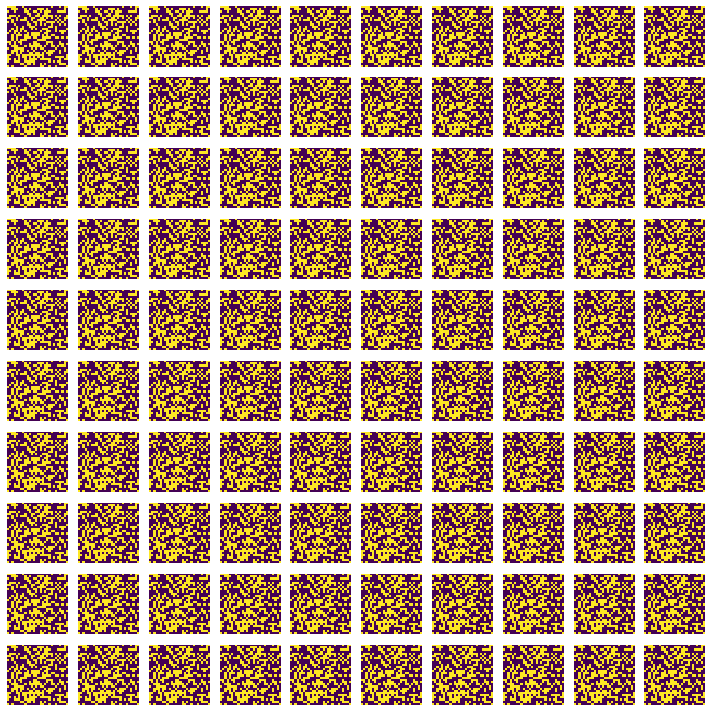

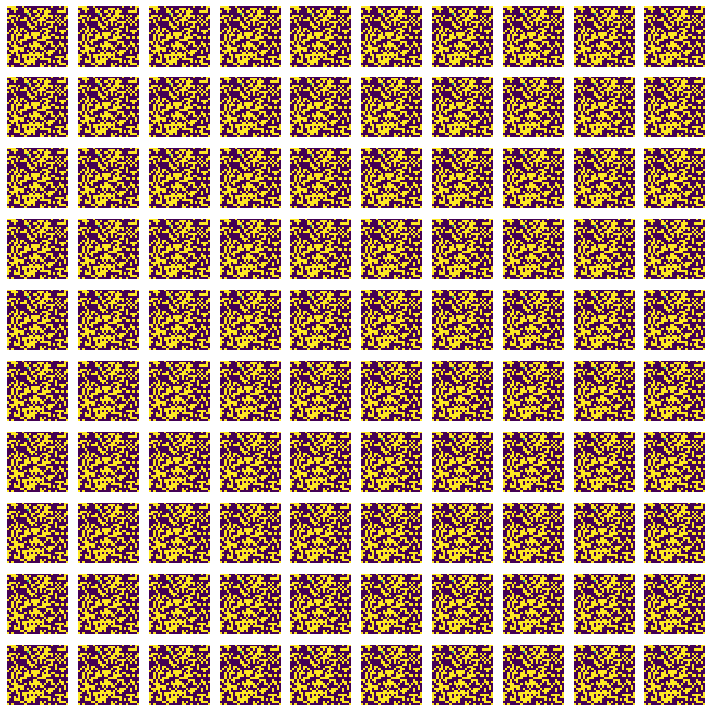

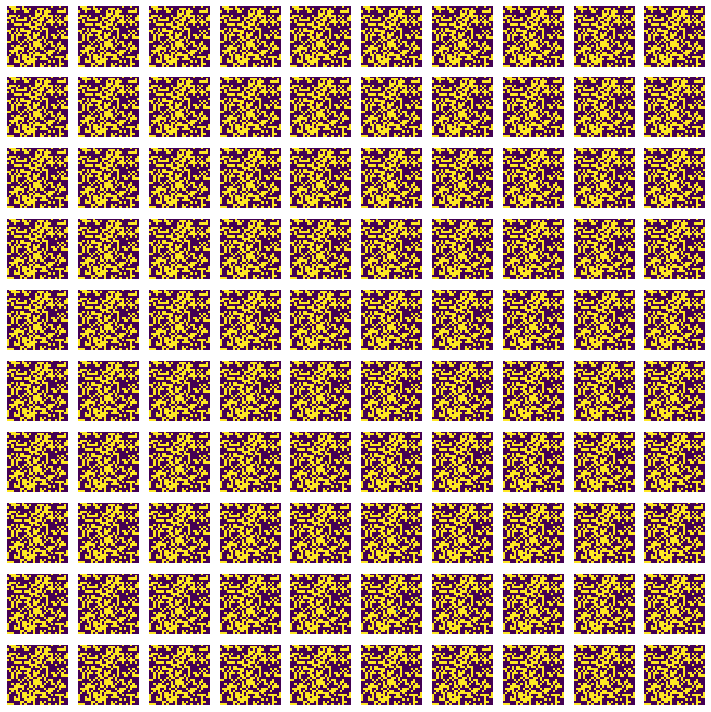

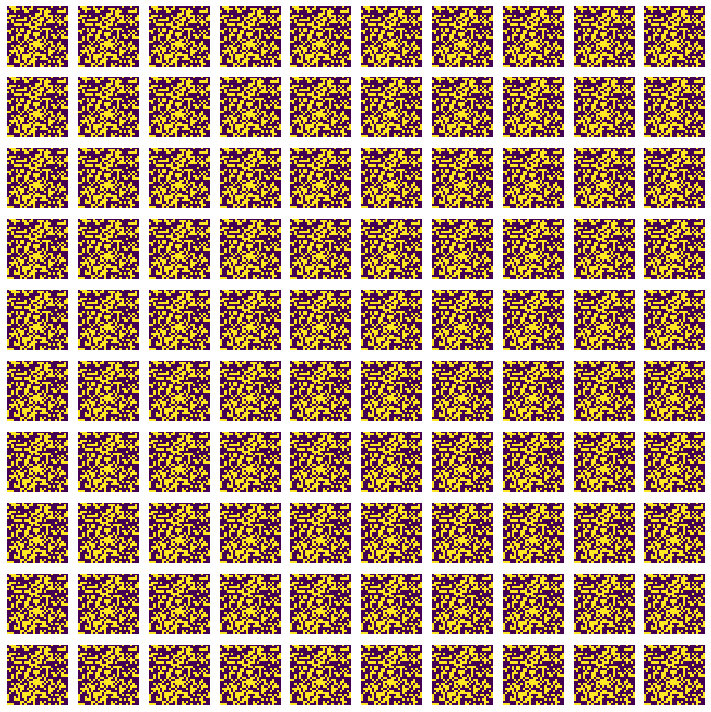

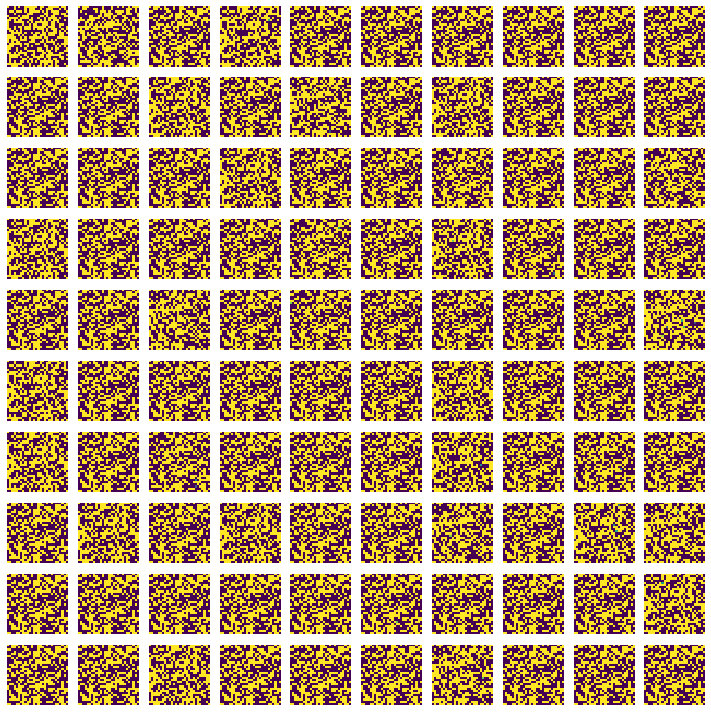

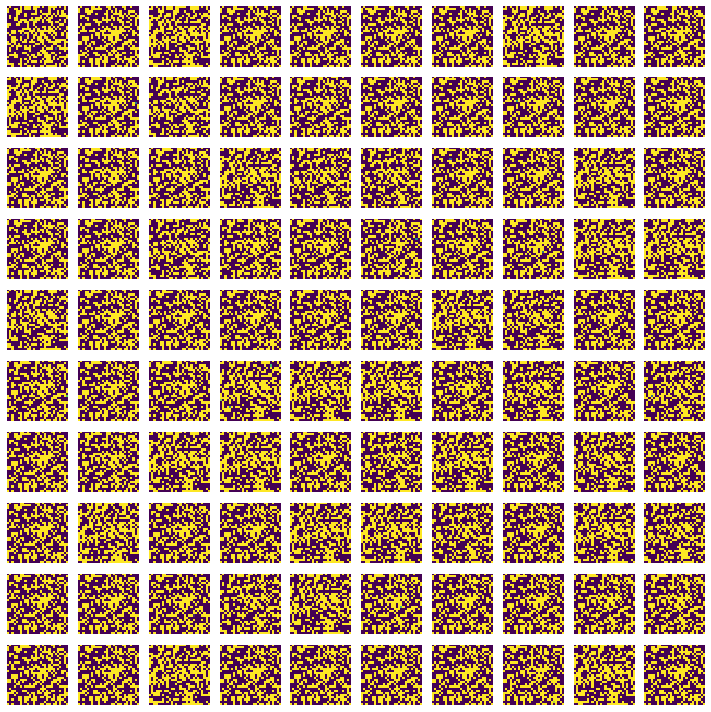

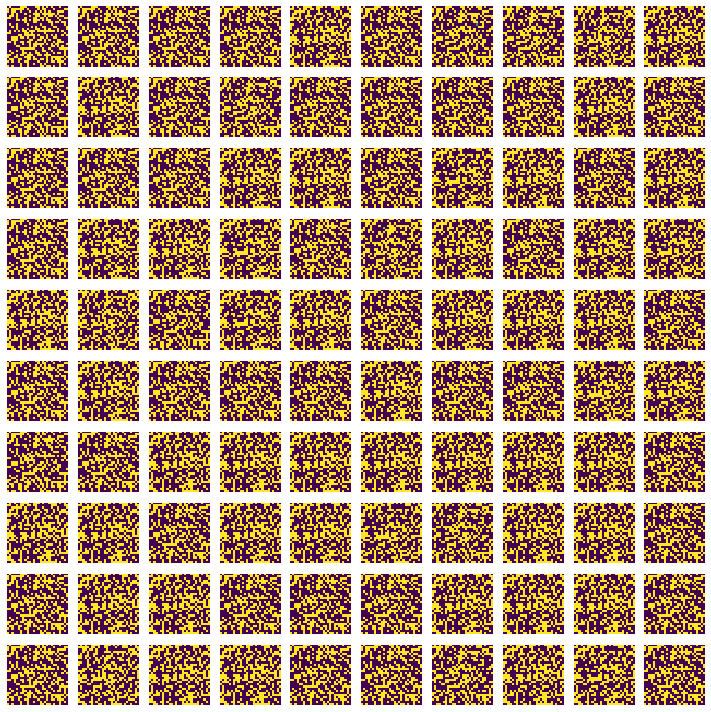

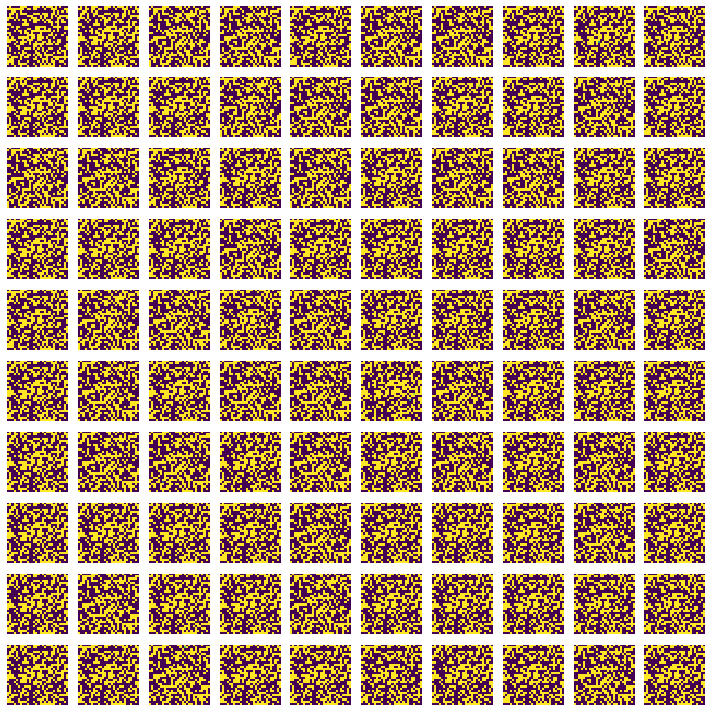

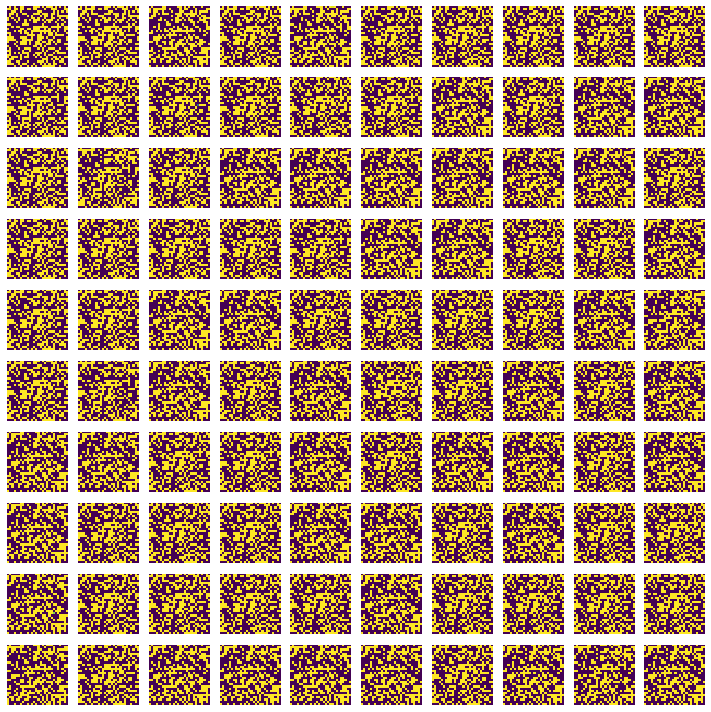

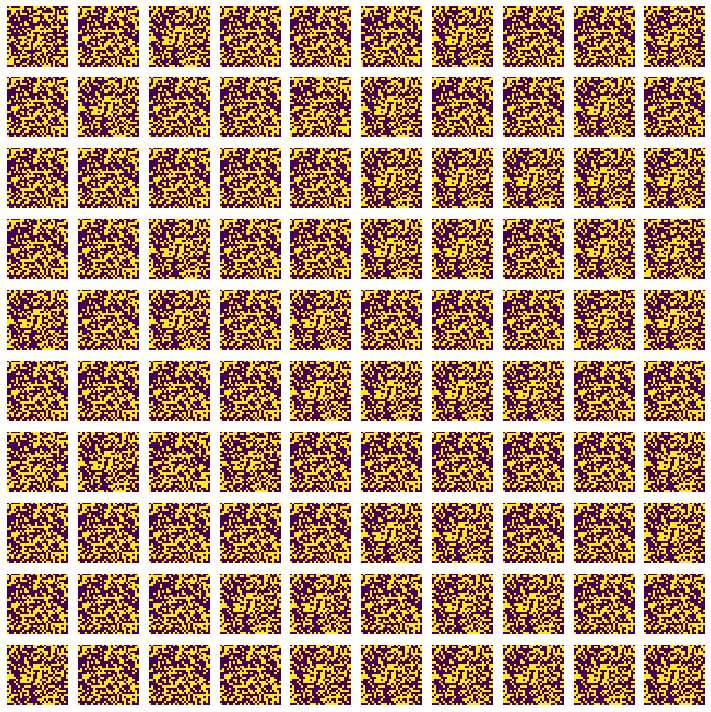

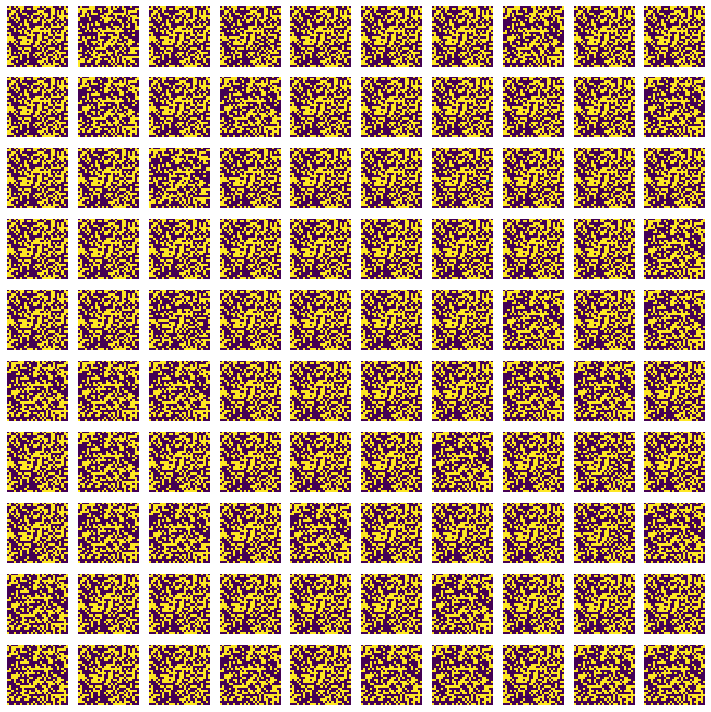

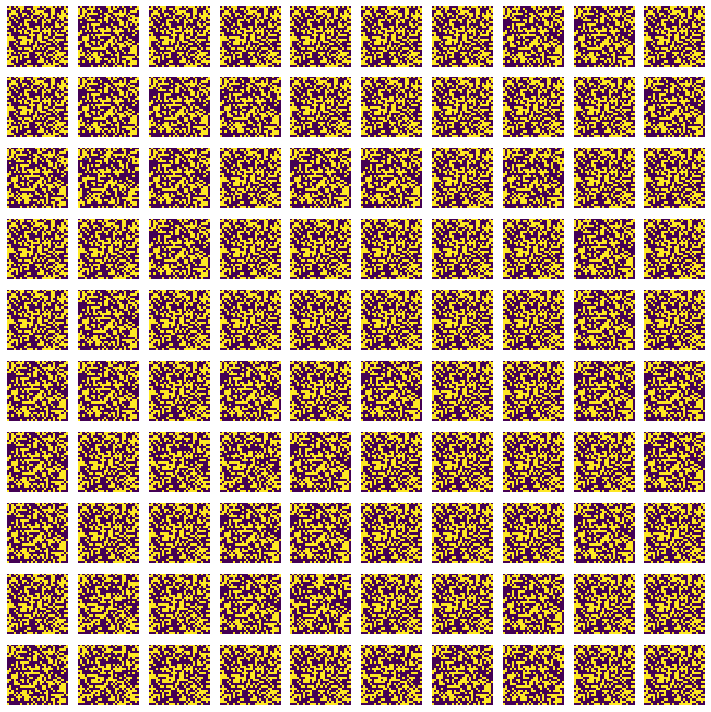

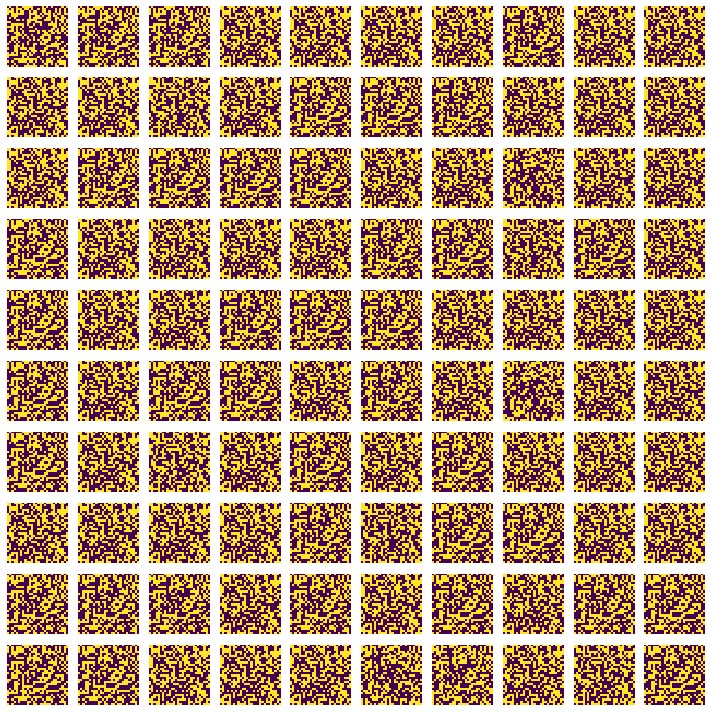

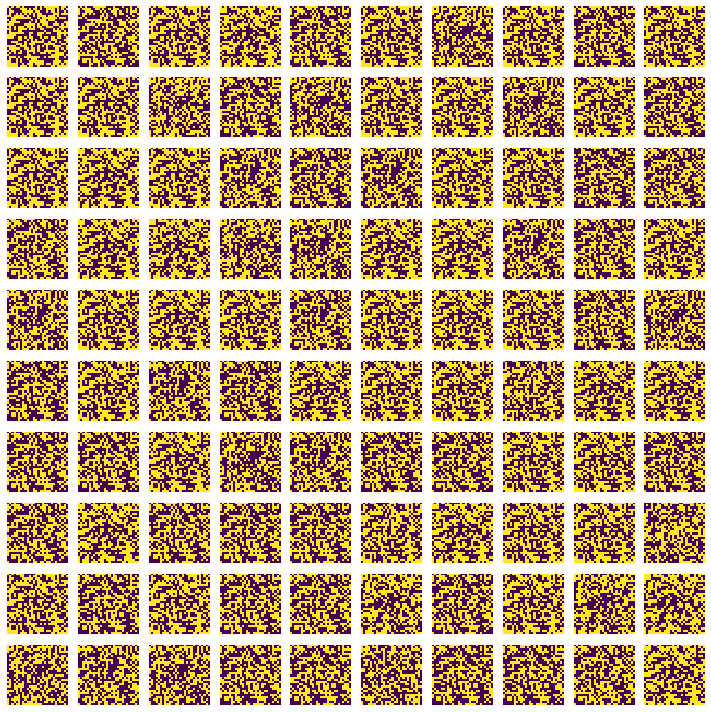

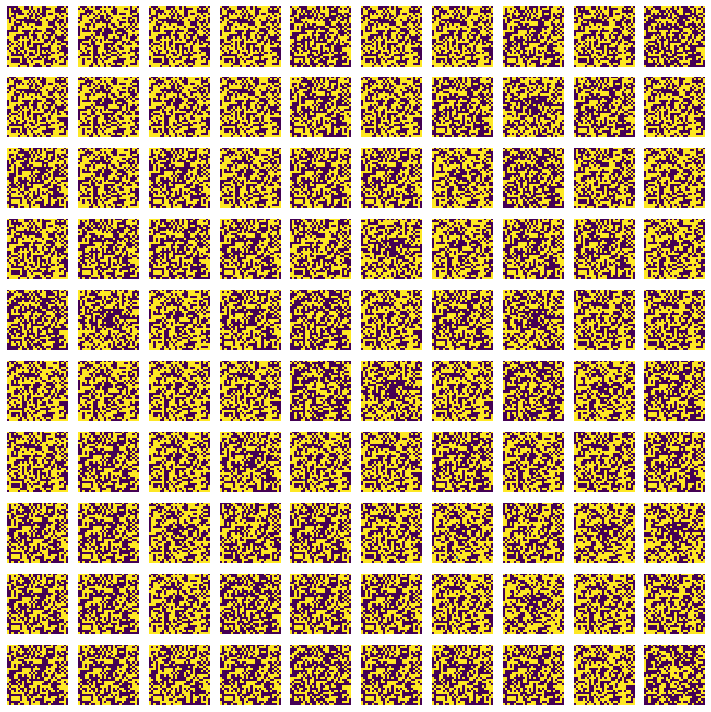

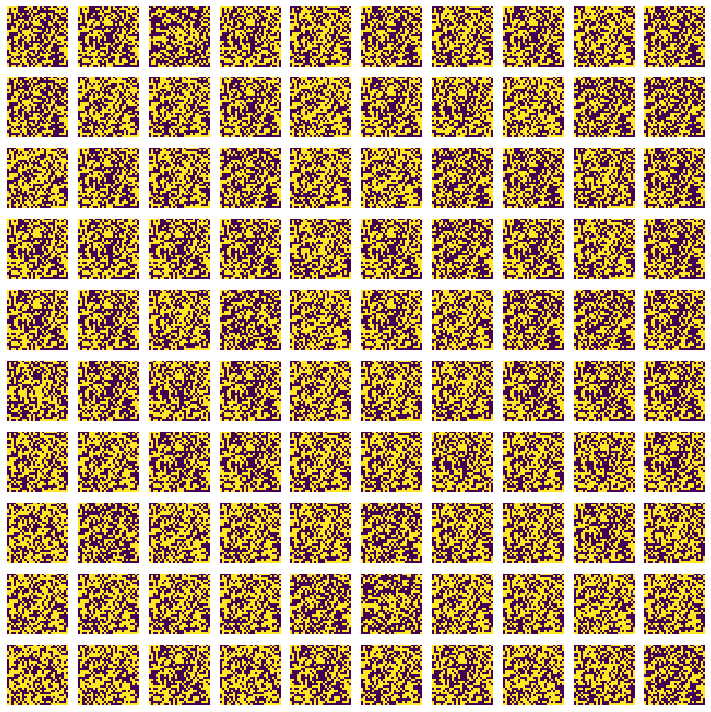

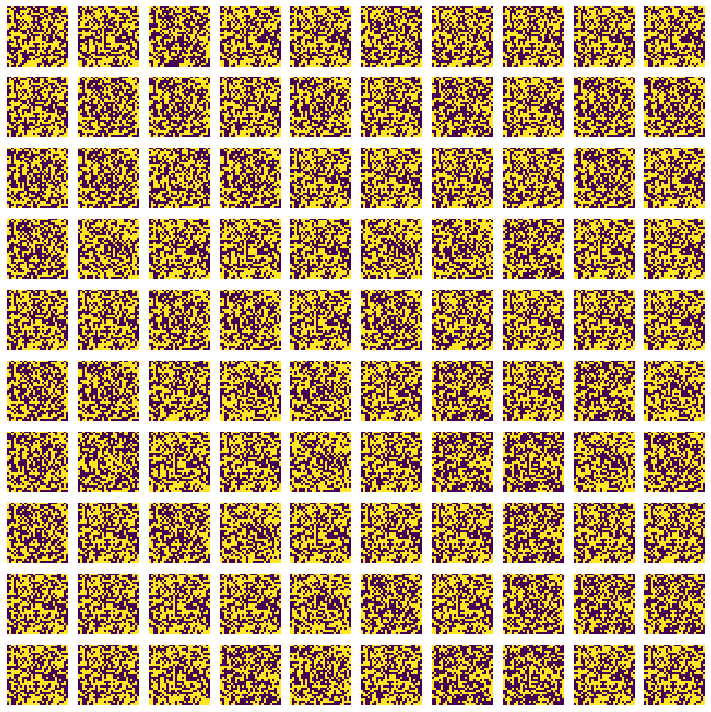

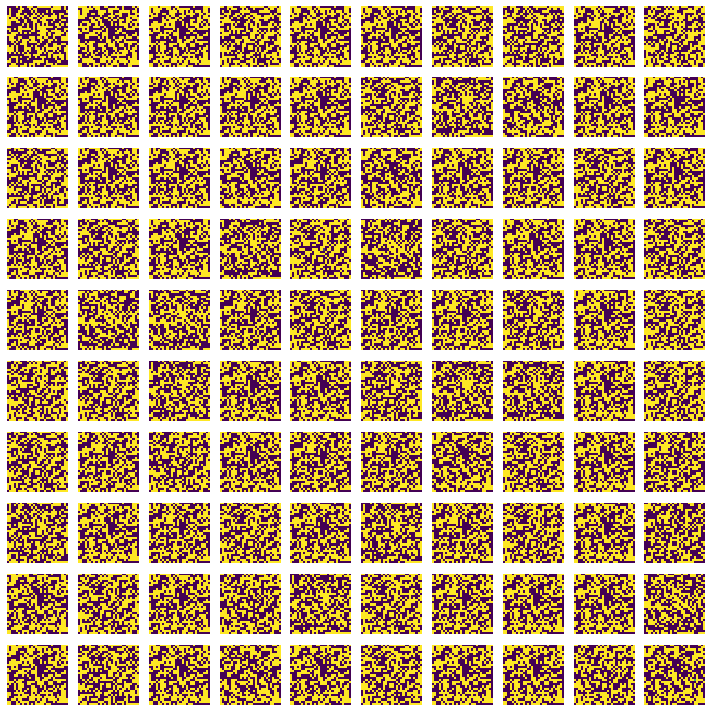

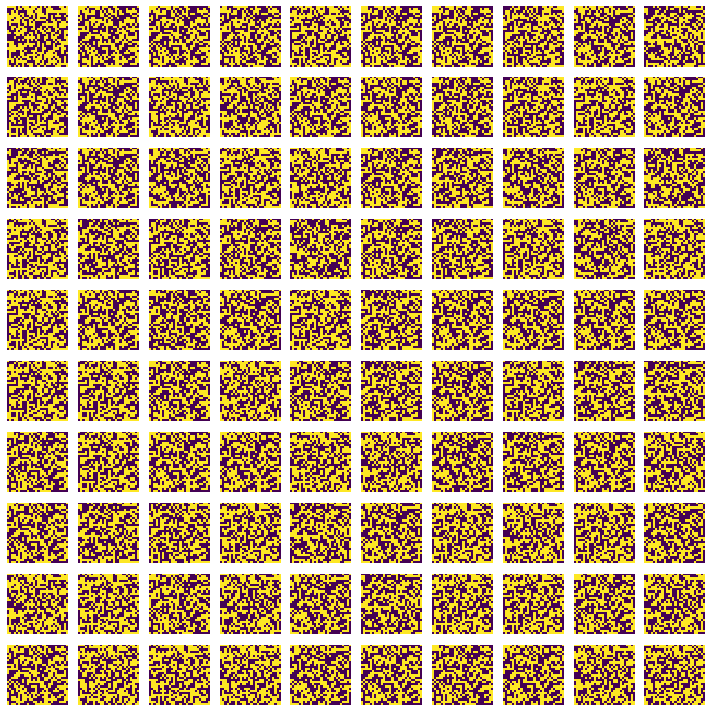

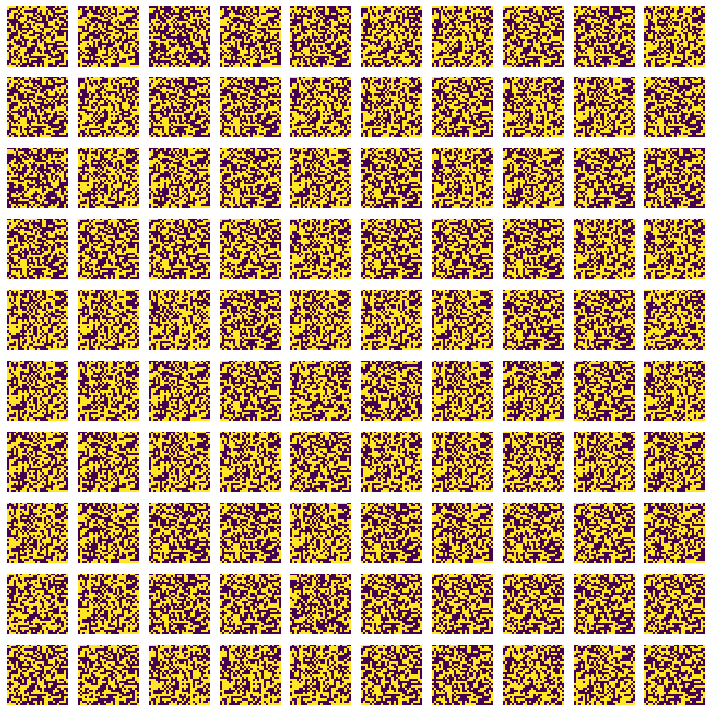

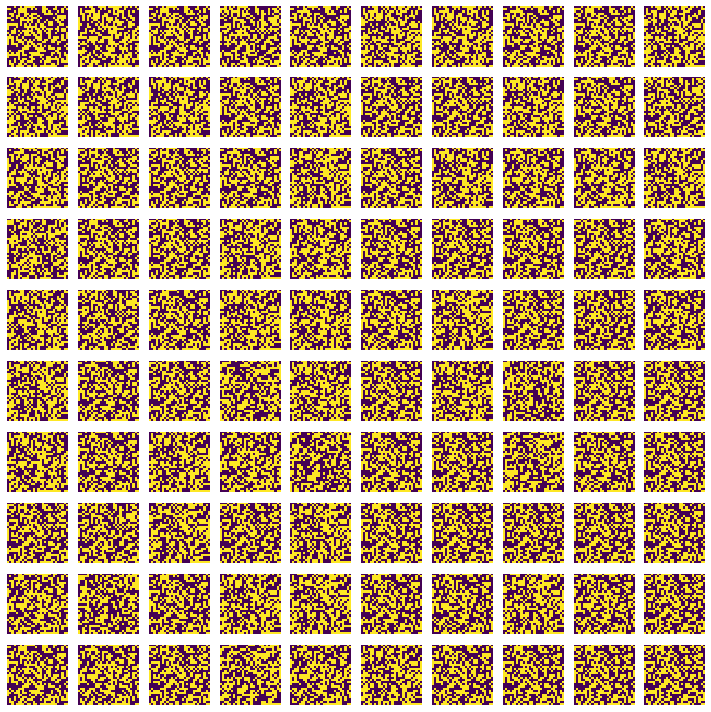

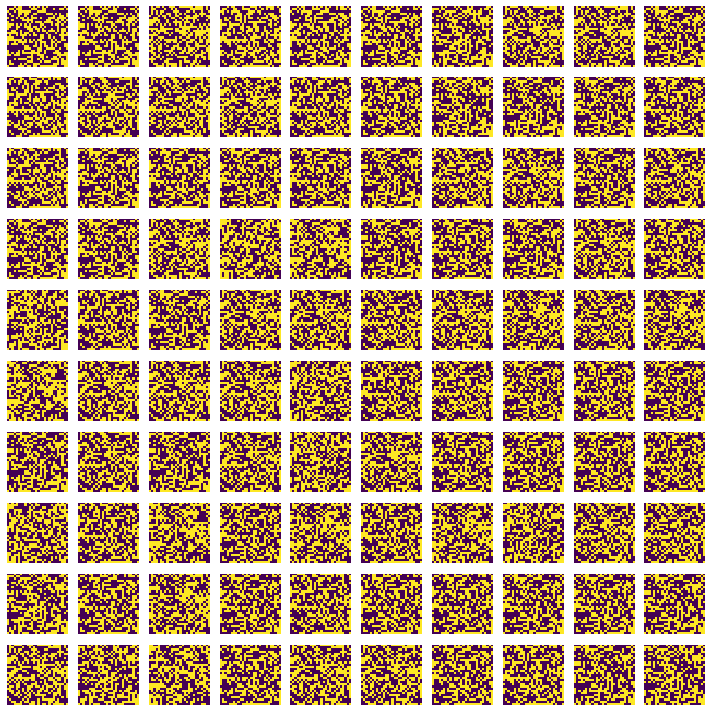

In [11]:
## training the model

def gen_training(epochs = 400,batch_size = 128):
  ## Loading the data
  (X_train, y_train, X_test, y_test) = load_data()
  batch_count = X_train.shape[0] / batch_size

  ## Generating GAN
  gen = gen_generator()
  dis = gen_discriminator()
  gan = gen_gan(dis,gen)

  for ep in range(epochs + 1):
    print("For Epoch --> " + str(ep))
    ## for progress bar
    for t in tqdm(range(batch_size)):
      ## Adding noise between 0 and 1
      noise = np.random.normal(0,1,[batch_size,100])

      #generating noise
      gen_image = gen.predict(noise)

      #Get a random images from raining dataset equivalent to batch size
      image_train = X_train[np.random.randint(low = 0,high=X_train.shape[0],size = batch_size)]

      #Merging Fake and Real images generated
      img_merged = np.concatenate([image_train,gen_image])

      #Creating Lables for generated and real dataset
      y_dis = np.zeros(2*batch_size)
      y_dis[:batch_size] = 0.9

      #Pre Training the discrimonator on fake and real data
      dis.trainable = True
      dis.train_on_batch(img_merged,y_dis)

      #Tricking the noised input of the Generator as real
      noise = np.random.normal(0,1,[batch_size,100])
      y_gen = np.ones(batch_size)

      #Fixing the weights of discriminator
      dis.trainable = False

      #Tranining the GAN network
      gan.train_on_batch(noise,y_gen)
    
    if ep == 1 or ep%20 == 0:
      gen_plot(ep,gen)


gen_training(400,128)



For Epoch --> 0


100%|██████████| 64/64 [00:03<00:00, 17.79it/s]


For Epoch --> 1


100%|██████████| 64/64 [00:02<00:00, 22.80it/s]


For Epoch --> 2


100%|██████████| 64/64 [00:02<00:00, 22.36it/s]


For Epoch --> 3


100%|██████████| 64/64 [00:02<00:00, 22.76it/s]


For Epoch --> 4


100%|██████████| 64/64 [00:02<00:00, 21.56it/s]


For Epoch --> 5


100%|██████████| 64/64 [00:02<00:00, 22.97it/s]


For Epoch --> 6


100%|██████████| 64/64 [00:02<00:00, 22.73it/s]


For Epoch --> 7


100%|██████████| 64/64 [00:02<00:00, 22.69it/s]


For Epoch --> 8


100%|██████████| 64/64 [00:02<00:00, 22.92it/s]


For Epoch --> 9


100%|██████████| 64/64 [00:02<00:00, 22.91it/s]


For Epoch --> 10


100%|██████████| 64/64 [00:02<00:00, 22.54it/s]


For Epoch --> 11


100%|██████████| 64/64 [00:02<00:00, 22.79it/s]


For Epoch --> 12


100%|██████████| 64/64 [00:02<00:00, 22.75it/s]


For Epoch --> 13


100%|██████████| 64/64 [00:02<00:00, 22.42it/s]


For Epoch --> 14


100%|██████████| 64/64 [00:02<00:00, 22.81it/s]


For Epoch --> 15


100%|██████████| 64/64 [00:02<00:00, 22.00it/s]


For Epoch --> 16


100%|██████████| 64/64 [00:02<00:00, 21.93it/s]


For Epoch --> 17


100%|██████████| 64/64 [00:02<00:00, 22.53it/s]


For Epoch --> 18


100%|██████████| 64/64 [00:02<00:00, 23.00it/s]


For Epoch --> 19


100%|██████████| 64/64 [00:02<00:00, 22.89it/s]


For Epoch --> 20


100%|██████████| 64/64 [00:02<00:00, 22.54it/s]


For Epoch --> 21


100%|██████████| 64/64 [00:02<00:00, 22.67it/s]


For Epoch --> 22


100%|██████████| 64/64 [00:02<00:00, 22.67it/s]


For Epoch --> 23


100%|██████████| 64/64 [00:02<00:00, 22.78it/s]


For Epoch --> 24


100%|██████████| 64/64 [00:02<00:00, 22.35it/s]


For Epoch --> 25


100%|██████████| 64/64 [00:02<00:00, 21.94it/s]


For Epoch --> 26


100%|██████████| 64/64 [00:02<00:00, 21.88it/s]


For Epoch --> 27


100%|██████████| 64/64 [00:02<00:00, 22.27it/s]


For Epoch --> 28


100%|██████████| 64/64 [00:02<00:00, 22.66it/s]


For Epoch --> 29


100%|██████████| 64/64 [00:02<00:00, 22.77it/s]


For Epoch --> 30


100%|██████████| 64/64 [00:02<00:00, 22.79it/s]


For Epoch --> 31


100%|██████████| 64/64 [00:02<00:00, 22.63it/s]


For Epoch --> 32


100%|██████████| 64/64 [00:02<00:00, 22.74it/s]


For Epoch --> 33


100%|██████████| 64/64 [00:02<00:00, 22.84it/s]


For Epoch --> 34


100%|██████████| 64/64 [00:02<00:00, 22.64it/s]


For Epoch --> 35


100%|██████████| 64/64 [00:02<00:00, 22.58it/s]


For Epoch --> 36


100%|██████████| 64/64 [00:02<00:00, 22.67it/s]


For Epoch --> 37


100%|██████████| 64/64 [00:02<00:00, 22.72it/s]


For Epoch --> 38


100%|██████████| 64/64 [00:02<00:00, 22.04it/s]


For Epoch --> 39


100%|██████████| 64/64 [00:02<00:00, 23.01it/s]


For Epoch --> 40


100%|██████████| 64/64 [00:02<00:00, 22.69it/s]


For Epoch --> 41


100%|██████████| 64/64 [00:02<00:00, 23.00it/s]


For Epoch --> 42


100%|██████████| 64/64 [00:02<00:00, 22.89it/s]


For Epoch --> 43


100%|██████████| 64/64 [00:02<00:00, 23.19it/s]


For Epoch --> 44


100%|██████████| 64/64 [00:02<00:00, 23.00it/s]


For Epoch --> 45


100%|██████████| 64/64 [00:02<00:00, 21.98it/s]


For Epoch --> 46


100%|██████████| 64/64 [00:02<00:00, 22.77it/s]


For Epoch --> 47


100%|██████████| 64/64 [00:02<00:00, 23.02it/s]


For Epoch --> 48


100%|██████████| 64/64 [00:02<00:00, 22.89it/s]


For Epoch --> 49


100%|██████████| 64/64 [00:02<00:00, 22.42it/s]


For Epoch --> 50


100%|██████████| 64/64 [00:02<00:00, 22.68it/s]


For Epoch --> 51


100%|██████████| 64/64 [00:02<00:00, 22.61it/s]


For Epoch --> 52


100%|██████████| 64/64 [00:07<00:00,  8.29it/s]


For Epoch --> 53


100%|██████████| 64/64 [00:02<00:00, 22.67it/s]


For Epoch --> 54


100%|██████████| 64/64 [00:02<00:00, 22.49it/s]


For Epoch --> 55


100%|██████████| 64/64 [00:02<00:00, 22.56it/s]


For Epoch --> 56


100%|██████████| 64/64 [00:02<00:00, 22.55it/s]


For Epoch --> 57


100%|██████████| 64/64 [00:02<00:00, 22.60it/s]


For Epoch --> 58


100%|██████████| 64/64 [00:02<00:00, 22.66it/s]


For Epoch --> 59


100%|██████████| 64/64 [00:02<00:00, 22.28it/s]


For Epoch --> 60


100%|██████████| 64/64 [00:02<00:00, 22.57it/s]


For Epoch --> 61


100%|██████████| 64/64 [00:02<00:00, 22.39it/s]


For Epoch --> 62


100%|██████████| 64/64 [00:03<00:00, 18.65it/s]


For Epoch --> 63


100%|██████████| 64/64 [00:02<00:00, 22.33it/s]


For Epoch --> 64


100%|██████████| 64/64 [00:02<00:00, 21.56it/s]


For Epoch --> 65


100%|██████████| 64/64 [00:02<00:00, 22.47it/s]


For Epoch --> 66


100%|██████████| 64/64 [00:02<00:00, 22.50it/s]


For Epoch --> 67


100%|██████████| 64/64 [00:02<00:00, 22.63it/s]


For Epoch --> 68


100%|██████████| 64/64 [00:02<00:00, 22.66it/s]


For Epoch --> 69


100%|██████████| 64/64 [00:02<00:00, 22.59it/s]


For Epoch --> 70


100%|██████████| 64/64 [00:02<00:00, 21.50it/s]


For Epoch --> 71


100%|██████████| 64/64 [00:02<00:00, 22.66it/s]


For Epoch --> 72


100%|██████████| 64/64 [00:02<00:00, 22.41it/s]


For Epoch --> 73


100%|██████████| 64/64 [00:02<00:00, 22.64it/s]


For Epoch --> 74


100%|██████████| 64/64 [00:02<00:00, 22.54it/s]


For Epoch --> 75


100%|██████████| 64/64 [00:02<00:00, 22.72it/s]


For Epoch --> 76


100%|██████████| 64/64 [00:02<00:00, 22.23it/s]


For Epoch --> 77


100%|██████████| 64/64 [00:02<00:00, 22.38it/s]


For Epoch --> 78


100%|██████████| 64/64 [00:02<00:00, 21.90it/s]


For Epoch --> 79


100%|██████████| 64/64 [00:02<00:00, 22.55it/s]


For Epoch --> 80


100%|██████████| 64/64 [00:02<00:00, 22.61it/s]


For Epoch --> 81


100%|██████████| 64/64 [00:02<00:00, 22.33it/s]


For Epoch --> 82


100%|██████████| 64/64 [00:02<00:00, 22.82it/s]


For Epoch --> 83


100%|██████████| 64/64 [00:02<00:00, 23.01it/s]


For Epoch --> 84


100%|██████████| 64/64 [00:02<00:00, 22.32it/s]


For Epoch --> 85


100%|██████████| 64/64 [00:02<00:00, 22.63it/s]


For Epoch --> 86


100%|██████████| 64/64 [00:02<00:00, 22.81it/s]


For Epoch --> 87


100%|██████████| 64/64 [00:02<00:00, 23.02it/s]


For Epoch --> 88


100%|██████████| 64/64 [00:02<00:00, 22.86it/s]


For Epoch --> 89


100%|██████████| 64/64 [00:02<00:00, 22.90it/s]


For Epoch --> 90


100%|██████████| 64/64 [00:02<00:00, 22.26it/s]


For Epoch --> 91


100%|██████████| 64/64 [00:02<00:00, 22.39it/s]


For Epoch --> 92


100%|██████████| 64/64 [00:02<00:00, 21.52it/s]


For Epoch --> 93


100%|██████████| 64/64 [00:02<00:00, 22.41it/s]


For Epoch --> 94


100%|██████████| 64/64 [00:02<00:00, 22.39it/s]


For Epoch --> 95


100%|██████████| 64/64 [00:02<00:00, 21.52it/s]


For Epoch --> 96


100%|██████████| 64/64 [00:02<00:00, 21.85it/s]


For Epoch --> 97


100%|██████████| 64/64 [00:02<00:00, 22.61it/s]


For Epoch --> 98


100%|██████████| 64/64 [00:02<00:00, 22.59it/s]


For Epoch --> 99


100%|██████████| 64/64 [00:02<00:00, 22.84it/s]


For Epoch --> 100


100%|██████████| 64/64 [00:02<00:00, 22.57it/s]


For Epoch --> 101


100%|██████████| 64/64 [00:02<00:00, 22.77it/s]


For Epoch --> 102


100%|██████████| 64/64 [00:02<00:00, 22.53it/s]


For Epoch --> 103


100%|██████████| 64/64 [00:02<00:00, 21.80it/s]


For Epoch --> 104


100%|██████████| 64/64 [00:02<00:00, 21.59it/s]


For Epoch --> 105


100%|██████████| 64/64 [00:02<00:00, 21.88it/s]


For Epoch --> 106


100%|██████████| 64/64 [00:02<00:00, 22.12it/s]


For Epoch --> 107


100%|██████████| 64/64 [00:02<00:00, 22.45it/s]


For Epoch --> 108


100%|██████████| 64/64 [00:02<00:00, 22.28it/s]


For Epoch --> 109


100%|██████████| 64/64 [00:02<00:00, 22.66it/s]


For Epoch --> 110


100%|██████████| 64/64 [00:02<00:00, 22.61it/s]


For Epoch --> 111


100%|██████████| 64/64 [00:02<00:00, 22.80it/s]


For Epoch --> 112


100%|██████████| 64/64 [00:02<00:00, 22.66it/s]


For Epoch --> 113


100%|██████████| 64/64 [00:02<00:00, 22.47it/s]


For Epoch --> 114


100%|██████████| 64/64 [00:02<00:00, 22.11it/s]


For Epoch --> 115


100%|██████████| 64/64 [00:02<00:00, 21.56it/s]


For Epoch --> 116


100%|██████████| 64/64 [00:02<00:00, 22.21it/s]


For Epoch --> 117


100%|██████████| 64/64 [00:02<00:00, 22.56it/s]


For Epoch --> 118


100%|██████████| 64/64 [00:02<00:00, 22.86it/s]


For Epoch --> 119


100%|██████████| 64/64 [00:02<00:00, 22.60it/s]


For Epoch --> 120


100%|██████████| 64/64 [00:02<00:00, 22.37it/s]


For Epoch --> 121


100%|██████████| 64/64 [00:02<00:00, 22.88it/s]


For Epoch --> 122


100%|██████████| 64/64 [00:02<00:00, 22.74it/s]


For Epoch --> 123


100%|██████████| 64/64 [00:02<00:00, 22.84it/s]


For Epoch --> 124


100%|██████████| 64/64 [00:02<00:00, 22.60it/s]


For Epoch --> 125


100%|██████████| 64/64 [00:02<00:00, 21.55it/s]


For Epoch --> 126


100%|██████████| 64/64 [00:02<00:00, 22.69it/s]


For Epoch --> 127


100%|██████████| 64/64 [00:02<00:00, 22.56it/s]


For Epoch --> 128


100%|██████████| 64/64 [00:02<00:00, 22.80it/s]


For Epoch --> 129


100%|██████████| 64/64 [00:02<00:00, 22.45it/s]


For Epoch --> 130


100%|██████████| 64/64 [00:02<00:00, 22.61it/s]


For Epoch --> 131


100%|██████████| 64/64 [00:02<00:00, 22.71it/s]


For Epoch --> 132


100%|██████████| 64/64 [00:03<00:00, 16.78it/s]


For Epoch --> 133


100%|██████████| 64/64 [00:02<00:00, 22.53it/s]


For Epoch --> 134


100%|██████████| 64/64 [00:02<00:00, 22.44it/s]


For Epoch --> 135


100%|██████████| 64/64 [00:02<00:00, 22.42it/s]


For Epoch --> 136


100%|██████████| 64/64 [00:02<00:00, 21.80it/s]


For Epoch --> 137


100%|██████████| 64/64 [00:02<00:00, 22.20it/s]


For Epoch --> 138


100%|██████████| 64/64 [00:02<00:00, 22.39it/s]


For Epoch --> 139


100%|██████████| 64/64 [00:02<00:00, 22.49it/s]


For Epoch --> 140


100%|██████████| 64/64 [00:02<00:00, 22.65it/s]


For Epoch --> 141


100%|██████████| 64/64 [00:02<00:00, 22.74it/s]


For Epoch --> 142


100%|██████████| 64/64 [00:02<00:00, 22.34it/s]


For Epoch --> 143


100%|██████████| 64/64 [00:02<00:00, 22.53it/s]


For Epoch --> 144


100%|██████████| 64/64 [00:02<00:00, 21.68it/s]


For Epoch --> 145


100%|██████████| 64/64 [00:03<00:00, 21.02it/s]


For Epoch --> 146


100%|██████████| 64/64 [00:02<00:00, 22.54it/s]


For Epoch --> 147


100%|██████████| 64/64 [00:02<00:00, 21.91it/s]


For Epoch --> 148


100%|██████████| 64/64 [00:02<00:00, 22.30it/s]


For Epoch --> 149


100%|██████████| 64/64 [00:02<00:00, 22.53it/s]


For Epoch --> 150


100%|██████████| 64/64 [00:02<00:00, 22.59it/s]


For Epoch --> 151


100%|██████████| 64/64 [00:02<00:00, 22.46it/s]


For Epoch --> 152


100%|██████████| 64/64 [00:02<00:00, 22.61it/s]


For Epoch --> 153


100%|██████████| 64/64 [00:02<00:00, 22.74it/s]


For Epoch --> 154


100%|██████████| 64/64 [00:02<00:00, 22.77it/s]


For Epoch --> 155


100%|██████████| 64/64 [00:02<00:00, 22.52it/s]


For Epoch --> 156


100%|██████████| 64/64 [00:02<00:00, 22.52it/s]


For Epoch --> 157


100%|██████████| 64/64 [00:02<00:00, 22.42it/s]


For Epoch --> 158


100%|██████████| 64/64 [00:02<00:00, 22.44it/s]


For Epoch --> 159


100%|██████████| 64/64 [00:02<00:00, 22.43it/s]


For Epoch --> 160


100%|██████████| 64/64 [00:02<00:00, 22.67it/s]


For Epoch --> 161


100%|██████████| 64/64 [00:02<00:00, 22.54it/s]


For Epoch --> 162


100%|██████████| 64/64 [00:02<00:00, 22.58it/s]


For Epoch --> 163


100%|██████████| 64/64 [00:02<00:00, 22.50it/s]


For Epoch --> 164


100%|██████████| 64/64 [00:02<00:00, 22.52it/s]


For Epoch --> 165


100%|██████████| 64/64 [00:02<00:00, 21.44it/s]


For Epoch --> 166


100%|██████████| 64/64 [00:02<00:00, 22.42it/s]


For Epoch --> 167


100%|██████████| 64/64 [00:02<00:00, 22.24it/s]


For Epoch --> 168


100%|██████████| 64/64 [00:02<00:00, 22.24it/s]


For Epoch --> 169


100%|██████████| 64/64 [00:02<00:00, 22.04it/s]


For Epoch --> 170


100%|██████████| 64/64 [00:02<00:00, 21.58it/s]


For Epoch --> 171


100%|██████████| 64/64 [00:02<00:00, 22.42it/s]


For Epoch --> 172


100%|██████████| 64/64 [00:02<00:00, 22.46it/s]


For Epoch --> 173


100%|██████████| 64/64 [00:02<00:00, 22.65it/s]


For Epoch --> 174


100%|██████████| 64/64 [00:02<00:00, 22.67it/s]


For Epoch --> 175


100%|██████████| 64/64 [00:02<00:00, 22.34it/s]


For Epoch --> 176


100%|██████████| 64/64 [00:02<00:00, 22.22it/s]


For Epoch --> 177


100%|██████████| 64/64 [00:02<00:00, 22.45it/s]


For Epoch --> 178


100%|██████████| 64/64 [00:02<00:00, 22.59it/s]


For Epoch --> 179


100%|██████████| 64/64 [00:02<00:00, 22.38it/s]


For Epoch --> 180


100%|██████████| 64/64 [00:02<00:00, 22.28it/s]


For Epoch --> 181


100%|██████████| 64/64 [00:02<00:00, 22.33it/s]


For Epoch --> 182


100%|██████████| 64/64 [00:02<00:00, 22.65it/s]


For Epoch --> 183


100%|██████████| 64/64 [00:02<00:00, 22.42it/s]


For Epoch --> 184


100%|██████████| 64/64 [00:02<00:00, 22.70it/s]


For Epoch --> 185


100%|██████████| 64/64 [00:02<00:00, 22.17it/s]


For Epoch --> 186


100%|██████████| 64/64 [00:02<00:00, 22.40it/s]


For Epoch --> 187


100%|██████████| 64/64 [00:02<00:00, 22.62it/s]


For Epoch --> 188


100%|██████████| 64/64 [00:02<00:00, 22.58it/s]


For Epoch --> 189


100%|██████████| 64/64 [00:02<00:00, 22.34it/s]


For Epoch --> 190


100%|██████████| 64/64 [00:02<00:00, 22.59it/s]


For Epoch --> 191


100%|██████████| 64/64 [00:02<00:00, 22.59it/s]


For Epoch --> 192


100%|██████████| 64/64 [00:04<00:00, 15.40it/s]


For Epoch --> 193


100%|██████████| 64/64 [00:02<00:00, 22.46it/s]


For Epoch --> 194


100%|██████████| 64/64 [00:02<00:00, 22.24it/s]


For Epoch --> 195


100%|██████████| 64/64 [00:02<00:00, 22.37it/s]


For Epoch --> 196


100%|██████████| 64/64 [00:02<00:00, 22.37it/s]


For Epoch --> 197


100%|██████████| 64/64 [00:02<00:00, 22.37it/s]


For Epoch --> 198


100%|██████████| 64/64 [00:02<00:00, 22.33it/s]


For Epoch --> 199


100%|██████████| 64/64 [00:02<00:00, 22.55it/s]


For Epoch --> 200


100%|██████████| 64/64 [00:02<00:00, 22.63it/s]


For Epoch --> 201


100%|██████████| 64/64 [00:02<00:00, 22.64it/s]


For Epoch --> 202


100%|██████████| 64/64 [00:02<00:00, 22.53it/s]


For Epoch --> 203


100%|██████████| 64/64 [00:02<00:00, 21.89it/s]


For Epoch --> 204


100%|██████████| 64/64 [00:02<00:00, 22.73it/s]


For Epoch --> 205


100%|██████████| 64/64 [00:02<00:00, 21.77it/s]


For Epoch --> 206


100%|██████████| 64/64 [00:02<00:00, 22.66it/s]


For Epoch --> 207


100%|██████████| 64/64 [00:02<00:00, 22.23it/s]


For Epoch --> 208


100%|██████████| 64/64 [00:02<00:00, 22.17it/s]


For Epoch --> 209


100%|██████████| 64/64 [00:02<00:00, 22.17it/s]


For Epoch --> 210


100%|██████████| 64/64 [00:02<00:00, 21.81it/s]


For Epoch --> 211


100%|██████████| 64/64 [00:02<00:00, 22.48it/s]


For Epoch --> 212


100%|██████████| 64/64 [00:02<00:00, 22.38it/s]


For Epoch --> 213


100%|██████████| 64/64 [00:02<00:00, 22.09it/s]


For Epoch --> 214


100%|██████████| 64/64 [00:03<00:00, 21.18it/s]


For Epoch --> 215


100%|██████████| 64/64 [00:02<00:00, 22.32it/s]


For Epoch --> 216


100%|██████████| 64/64 [00:02<00:00, 21.43it/s]


For Epoch --> 217


100%|██████████| 64/64 [00:02<00:00, 22.40it/s]


For Epoch --> 218


100%|██████████| 64/64 [00:02<00:00, 22.71it/s]


For Epoch --> 219


100%|██████████| 64/64 [00:02<00:00, 22.57it/s]


For Epoch --> 220


100%|██████████| 64/64 [00:02<00:00, 22.57it/s]


For Epoch --> 221


100%|██████████| 64/64 [00:02<00:00, 22.30it/s]


For Epoch --> 222


100%|██████████| 64/64 [00:02<00:00, 22.59it/s]


For Epoch --> 223


100%|██████████| 64/64 [00:02<00:00, 22.28it/s]


For Epoch --> 224


100%|██████████| 64/64 [00:02<00:00, 21.71it/s]


For Epoch --> 225


100%|██████████| 64/64 [00:03<00:00, 20.85it/s]


For Epoch --> 226


100%|██████████| 64/64 [00:02<00:00, 22.40it/s]


For Epoch --> 227


100%|██████████| 64/64 [00:02<00:00, 22.38it/s]


For Epoch --> 228


100%|██████████| 64/64 [00:02<00:00, 22.21it/s]


For Epoch --> 229


100%|██████████| 64/64 [00:02<00:00, 22.40it/s]


For Epoch --> 230


100%|██████████| 64/64 [00:02<00:00, 22.43it/s]


For Epoch --> 231


100%|██████████| 64/64 [00:02<00:00, 22.30it/s]


For Epoch --> 232


100%|██████████| 64/64 [00:02<00:00, 22.34it/s]


For Epoch --> 233


100%|██████████| 64/64 [00:02<00:00, 22.18it/s]


For Epoch --> 234


100%|██████████| 64/64 [00:02<00:00, 22.47it/s]


For Epoch --> 235


100%|██████████| 64/64 [00:02<00:00, 22.17it/s]


For Epoch --> 236


100%|██████████| 64/64 [00:03<00:00, 21.19it/s]


For Epoch --> 237


100%|██████████| 64/64 [00:02<00:00, 22.22it/s]


For Epoch --> 238


100%|██████████| 64/64 [00:02<00:00, 21.81it/s]


For Epoch --> 239


100%|██████████| 64/64 [00:02<00:00, 21.93it/s]


For Epoch --> 240


100%|██████████| 64/64 [00:02<00:00, 22.20it/s]


For Epoch --> 241


100%|██████████| 64/64 [00:02<00:00, 22.72it/s]


For Epoch --> 242


100%|██████████| 64/64 [00:02<00:00, 22.73it/s]


For Epoch --> 243


100%|██████████| 64/64 [00:02<00:00, 22.96it/s]


For Epoch --> 244


100%|██████████| 64/64 [00:02<00:00, 22.93it/s]


For Epoch --> 245


100%|██████████| 64/64 [00:02<00:00, 22.02it/s]


For Epoch --> 246


100%|██████████| 64/64 [00:02<00:00, 23.08it/s]


For Epoch --> 247


100%|██████████| 64/64 [00:02<00:00, 21.93it/s]


For Epoch --> 248


100%|██████████| 64/64 [00:02<00:00, 23.03it/s]


For Epoch --> 249


100%|██████████| 64/64 [00:02<00:00, 22.96it/s]


For Epoch --> 250


100%|██████████| 64/64 [00:02<00:00, 22.90it/s]


For Epoch --> 251


100%|██████████| 64/64 [00:02<00:00, 22.11it/s]


For Epoch --> 252


100%|██████████| 64/64 [00:02<00:00, 22.72it/s]


For Epoch --> 253


100%|██████████| 64/64 [00:02<00:00, 22.28it/s]


For Epoch --> 254


100%|██████████| 64/64 [00:02<00:00, 22.36it/s]


For Epoch --> 255


100%|██████████| 64/64 [00:02<00:00, 22.48it/s]


For Epoch --> 256


100%|██████████| 64/64 [00:02<00:00, 22.24it/s]


For Epoch --> 257


100%|██████████| 64/64 [00:02<00:00, 21.57it/s]


For Epoch --> 258


100%|██████████| 64/64 [00:03<00:00, 20.46it/s]


For Epoch --> 259


100%|██████████| 64/64 [00:02<00:00, 22.74it/s]


For Epoch --> 260


100%|██████████| 64/64 [00:02<00:00, 22.67it/s]


For Epoch --> 261


100%|██████████| 64/64 [00:04<00:00, 14.55it/s]


For Epoch --> 262


100%|██████████| 64/64 [00:02<00:00, 22.60it/s]


For Epoch --> 263


100%|██████████| 64/64 [00:02<00:00, 22.31it/s]


For Epoch --> 264


100%|██████████| 64/64 [00:02<00:00, 22.27it/s]


For Epoch --> 265


100%|██████████| 64/64 [00:02<00:00, 22.09it/s]


For Epoch --> 266


100%|██████████| 64/64 [00:02<00:00, 22.27it/s]


For Epoch --> 267


100%|██████████| 64/64 [00:02<00:00, 22.28it/s]


For Epoch --> 268


100%|██████████| 64/64 [00:02<00:00, 21.67it/s]


For Epoch --> 269


100%|██████████| 64/64 [00:02<00:00, 22.13it/s]


For Epoch --> 270


100%|██████████| 64/64 [00:02<00:00, 22.46it/s]


For Epoch --> 271


100%|██████████| 64/64 [00:02<00:00, 22.55it/s]


For Epoch --> 272


100%|██████████| 64/64 [00:02<00:00, 22.51it/s]


For Epoch --> 273


100%|██████████| 64/64 [00:02<00:00, 22.48it/s]


For Epoch --> 274


100%|██████████| 64/64 [00:02<00:00, 22.45it/s]


For Epoch --> 275


100%|██████████| 64/64 [00:02<00:00, 22.48it/s]


For Epoch --> 276


100%|██████████| 64/64 [00:02<00:00, 22.51it/s]


For Epoch --> 277


100%|██████████| 64/64 [00:02<00:00, 22.50it/s]


For Epoch --> 278


100%|██████████| 64/64 [00:02<00:00, 22.54it/s]


For Epoch --> 279


100%|██████████| 64/64 [00:02<00:00, 21.62it/s]


For Epoch --> 280


100%|██████████| 64/64 [00:02<00:00, 21.63it/s]


For Epoch --> 281


100%|██████████| 64/64 [00:02<00:00, 22.66it/s]


For Epoch --> 282


100%|██████████| 64/64 [00:02<00:00, 22.73it/s]


For Epoch --> 283


100%|██████████| 64/64 [00:02<00:00, 22.44it/s]


For Epoch --> 284


100%|██████████| 64/64 [00:02<00:00, 22.68it/s]


For Epoch --> 285


100%|██████████| 64/64 [00:02<00:00, 21.55it/s]


For Epoch --> 286


100%|██████████| 64/64 [00:02<00:00, 22.51it/s]


For Epoch --> 287


100%|██████████| 64/64 [00:02<00:00, 22.38it/s]


For Epoch --> 288


100%|██████████| 64/64 [00:02<00:00, 22.64it/s]


For Epoch --> 289


100%|██████████| 64/64 [00:02<00:00, 22.55it/s]


For Epoch --> 290


100%|██████████| 64/64 [00:02<00:00, 22.64it/s]


For Epoch --> 291


100%|██████████| 64/64 [00:02<00:00, 22.56it/s]


For Epoch --> 292


100%|██████████| 64/64 [00:02<00:00, 22.32it/s]


For Epoch --> 293


100%|██████████| 64/64 [00:02<00:00, 22.50it/s]


For Epoch --> 294


100%|██████████| 64/64 [00:02<00:00, 22.45it/s]


For Epoch --> 295


100%|██████████| 64/64 [00:02<00:00, 22.66it/s]


For Epoch --> 296


100%|██████████| 64/64 [00:02<00:00, 22.37it/s]


For Epoch --> 297


100%|██████████| 64/64 [00:02<00:00, 22.79it/s]


For Epoch --> 298


100%|██████████| 64/64 [00:02<00:00, 22.25it/s]


For Epoch --> 299


100%|██████████| 64/64 [00:02<00:00, 22.70it/s]


For Epoch --> 300


100%|██████████| 64/64 [00:02<00:00, 22.56it/s]


For Epoch --> 301


100%|██████████| 64/64 [00:02<00:00, 22.81it/s]


For Epoch --> 302


100%|██████████| 64/64 [00:02<00:00, 21.63it/s]


For Epoch --> 303


100%|██████████| 64/64 [00:02<00:00, 22.75it/s]


For Epoch --> 304


100%|██████████| 64/64 [00:02<00:00, 22.51it/s]


For Epoch --> 305


100%|██████████| 64/64 [00:02<00:00, 22.65it/s]


For Epoch --> 306


100%|██████████| 64/64 [00:02<00:00, 22.00it/s]


For Epoch --> 307


100%|██████████| 64/64 [00:02<00:00, 22.68it/s]


For Epoch --> 308


100%|██████████| 64/64 [00:02<00:00, 22.71it/s]


For Epoch --> 309


100%|██████████| 64/64 [00:02<00:00, 22.76it/s]


For Epoch --> 310


100%|██████████| 64/64 [00:02<00:00, 22.67it/s]


For Epoch --> 311


100%|██████████| 64/64 [00:02<00:00, 22.30it/s]


For Epoch --> 312


100%|██████████| 64/64 [00:04<00:00, 13.59it/s]


For Epoch --> 313


100%|██████████| 64/64 [00:03<00:00, 20.85it/s]


For Epoch --> 314


100%|██████████| 64/64 [00:02<00:00, 22.10it/s]


For Epoch --> 315


100%|██████████| 64/64 [00:02<00:00, 22.29it/s]


For Epoch --> 316


100%|██████████| 64/64 [00:02<00:00, 21.40it/s]


For Epoch --> 317


100%|██████████| 64/64 [00:02<00:00, 22.40it/s]


For Epoch --> 318


100%|██████████| 64/64 [00:02<00:00, 22.33it/s]


For Epoch --> 319


100%|██████████| 64/64 [00:02<00:00, 22.33it/s]


For Epoch --> 320


100%|██████████| 64/64 [00:02<00:00, 22.25it/s]


For Epoch --> 321


100%|██████████| 64/64 [00:02<00:00, 22.75it/s]


For Epoch --> 322


100%|██████████| 64/64 [00:02<00:00, 22.72it/s]


For Epoch --> 323


100%|██████████| 64/64 [00:02<00:00, 22.70it/s]


For Epoch --> 324


100%|██████████| 64/64 [00:02<00:00, 21.60it/s]


For Epoch --> 325


100%|██████████| 64/64 [00:02<00:00, 22.12it/s]


For Epoch --> 326


100%|██████████| 64/64 [00:02<00:00, 22.48it/s]


For Epoch --> 327


100%|██████████| 64/64 [00:02<00:00, 22.48it/s]


For Epoch --> 328


100%|██████████| 64/64 [00:02<00:00, 22.32it/s]


For Epoch --> 329


100%|██████████| 64/64 [00:02<00:00, 22.32it/s]


For Epoch --> 330


100%|██████████| 64/64 [00:02<00:00, 22.37it/s]


For Epoch --> 331


100%|██████████| 64/64 [00:02<00:00, 22.46it/s]


For Epoch --> 332


100%|██████████| 64/64 [00:02<00:00, 21.69it/s]


For Epoch --> 333


100%|██████████| 64/64 [00:02<00:00, 22.37it/s]


For Epoch --> 334


100%|██████████| 64/64 [00:02<00:00, 22.29it/s]


For Epoch --> 335


100%|██████████| 64/64 [00:03<00:00, 21.27it/s]


For Epoch --> 336


100%|██████████| 64/64 [00:02<00:00, 22.33it/s]


For Epoch --> 337


100%|██████████| 64/64 [00:02<00:00, 22.41it/s]


For Epoch --> 338


100%|██████████| 64/64 [00:02<00:00, 22.63it/s]


For Epoch --> 339


100%|██████████| 64/64 [00:02<00:00, 22.53it/s]


For Epoch --> 340


100%|██████████| 64/64 [00:02<00:00, 22.27it/s]


For Epoch --> 341


100%|██████████| 64/64 [00:02<00:00, 22.43it/s]


For Epoch --> 342


100%|██████████| 64/64 [00:02<00:00, 22.61it/s]


For Epoch --> 343


100%|██████████| 64/64 [00:02<00:00, 22.47it/s]


For Epoch --> 344


100%|██████████| 64/64 [00:02<00:00, 22.51it/s]


For Epoch --> 345


100%|██████████| 64/64 [00:02<00:00, 22.40it/s]


For Epoch --> 346


100%|██████████| 64/64 [00:02<00:00, 22.01it/s]


For Epoch --> 347


100%|██████████| 64/64 [00:02<00:00, 22.29it/s]


For Epoch --> 348


100%|██████████| 64/64 [00:02<00:00, 22.33it/s]


For Epoch --> 349


100%|██████████| 64/64 [00:02<00:00, 22.36it/s]


For Epoch --> 350


100%|██████████| 64/64 [00:02<00:00, 22.44it/s]


For Epoch --> 351


100%|██████████| 64/64 [00:02<00:00, 22.60it/s]


For Epoch --> 352


100%|██████████| 64/64 [00:02<00:00, 22.39it/s]


For Epoch --> 353


100%|██████████| 64/64 [00:02<00:00, 22.43it/s]


For Epoch --> 354


100%|██████████| 64/64 [00:02<00:00, 22.36it/s]


For Epoch --> 355


100%|██████████| 64/64 [00:02<00:00, 22.36it/s]


For Epoch --> 356


100%|██████████| 64/64 [00:02<00:00, 22.61it/s]


For Epoch --> 357


100%|██████████| 64/64 [00:02<00:00, 22.43it/s]


For Epoch --> 358


100%|██████████| 64/64 [00:02<00:00, 21.83it/s]


For Epoch --> 359


100%|██████████| 64/64 [00:02<00:00, 22.61it/s]


For Epoch --> 360


100%|██████████| 64/64 [00:02<00:00, 22.41it/s]


For Epoch --> 361


100%|██████████| 64/64 [00:02<00:00, 22.36it/s]


For Epoch --> 362


100%|██████████| 64/64 [00:02<00:00, 22.40it/s]


For Epoch --> 363


100%|██████████| 64/64 [00:02<00:00, 22.55it/s]


For Epoch --> 364


100%|██████████| 64/64 [00:02<00:00, 22.40it/s]


For Epoch --> 365


100%|██████████| 64/64 [00:02<00:00, 21.55it/s]


For Epoch --> 366


100%|██████████| 64/64 [00:02<00:00, 21.87it/s]


For Epoch --> 367


100%|██████████| 64/64 [00:02<00:00, 22.19it/s]


For Epoch --> 368


100%|██████████| 64/64 [00:02<00:00, 21.61it/s]


For Epoch --> 369


100%|██████████| 64/64 [00:02<00:00, 22.58it/s]


For Epoch --> 370


100%|██████████| 64/64 [00:02<00:00, 22.25it/s]


For Epoch --> 371


100%|██████████| 64/64 [00:02<00:00, 22.25it/s]


For Epoch --> 372


100%|██████████| 64/64 [00:02<00:00, 22.17it/s]


For Epoch --> 373


100%|██████████| 64/64 [00:02<00:00, 22.20it/s]


For Epoch --> 374


100%|██████████| 64/64 [00:02<00:00, 22.13it/s]


For Epoch --> 375


100%|██████████| 64/64 [00:02<00:00, 22.23it/s]


For Epoch --> 376


100%|██████████| 64/64 [00:02<00:00, 22.30it/s]


For Epoch --> 377


100%|██████████| 64/64 [00:02<00:00, 22.30it/s]


For Epoch --> 378


100%|██████████| 64/64 [00:02<00:00, 22.22it/s]


For Epoch --> 379


100%|██████████| 64/64 [00:03<00:00, 21.27it/s]


For Epoch --> 380


100%|██████████| 64/64 [00:02<00:00, 22.08it/s]
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  # Remove the CWD from sys.path while we load stuff.


For Epoch --> 381


100%|██████████| 64/64 [00:02<00:00, 22.71it/s]


For Epoch --> 382


100%|██████████| 64/64 [00:02<00:00, 22.35it/s]


For Epoch --> 383


100%|██████████| 64/64 [00:02<00:00, 22.37it/s]


For Epoch --> 384


100%|██████████| 64/64 [00:02<00:00, 22.74it/s]


For Epoch --> 385


100%|██████████| 64/64 [00:02<00:00, 22.22it/s]


For Epoch --> 386


100%|██████████| 64/64 [00:02<00:00, 21.81it/s]


For Epoch --> 387


100%|██████████| 64/64 [00:02<00:00, 22.69it/s]


For Epoch --> 388


100%|██████████| 64/64 [00:02<00:00, 22.29it/s]


For Epoch --> 389


100%|██████████| 64/64 [00:02<00:00, 22.52it/s]


For Epoch --> 390


100%|██████████| 64/64 [00:02<00:00, 21.85it/s]


For Epoch --> 391


100%|██████████| 64/64 [00:02<00:00, 22.52it/s]


For Epoch --> 392


100%|██████████| 64/64 [00:02<00:00, 22.52it/s]


For Epoch --> 393


100%|██████████| 64/64 [00:02<00:00, 22.31it/s]


For Epoch --> 394


100%|██████████| 64/64 [00:02<00:00, 22.14it/s]


For Epoch --> 395


100%|██████████| 64/64 [00:02<00:00, 22.63it/s]


For Epoch --> 396


100%|██████████| 64/64 [00:02<00:00, 22.47it/s]


For Epoch --> 397


100%|██████████| 64/64 [00:02<00:00, 22.56it/s]


For Epoch --> 398


100%|██████████| 64/64 [00:02<00:00, 22.46it/s]


For Epoch --> 399


100%|██████████| 64/64 [00:02<00:00, 22.29it/s]


For Epoch --> 400


100%|██████████| 64/64 [00:02<00:00, 22.50it/s]


For Epoch --> 401


100%|██████████| 64/64 [00:02<00:00, 22.13it/s]


For Epoch --> 402


100%|██████████| 64/64 [00:02<00:00, 22.16it/s]


For Epoch --> 403


100%|██████████| 64/64 [00:02<00:00, 22.26it/s]


For Epoch --> 404


100%|██████████| 64/64 [00:02<00:00, 22.82it/s]


For Epoch --> 405


100%|██████████| 64/64 [00:02<00:00, 22.89it/s]


For Epoch --> 406


100%|██████████| 64/64 [00:02<00:00, 21.55it/s]


For Epoch --> 407


100%|██████████| 64/64 [00:02<00:00, 22.66it/s]


For Epoch --> 408


100%|██████████| 64/64 [00:02<00:00, 22.95it/s]


For Epoch --> 409


100%|██████████| 64/64 [00:02<00:00, 22.81it/s]


For Epoch --> 410


100%|██████████| 64/64 [00:02<00:00, 22.91it/s]


For Epoch --> 411


100%|██████████| 64/64 [00:02<00:00, 22.93it/s]


For Epoch --> 412


100%|██████████| 64/64 [00:02<00:00, 22.81it/s]


For Epoch --> 413


100%|██████████| 64/64 [00:03<00:00, 21.27it/s]


For Epoch --> 414


100%|██████████| 64/64 [00:02<00:00, 22.52it/s]


For Epoch --> 415


100%|██████████| 64/64 [00:02<00:00, 22.00it/s]


For Epoch --> 416


100%|██████████| 64/64 [00:02<00:00, 21.36it/s]


For Epoch --> 417


100%|██████████| 64/64 [00:02<00:00, 22.00it/s]


For Epoch --> 418


100%|██████████| 64/64 [00:02<00:00, 21.68it/s]


For Epoch --> 419


100%|██████████| 64/64 [00:02<00:00, 21.35it/s]


For Epoch --> 420


100%|██████████| 64/64 [00:02<00:00, 22.26it/s]


For Epoch --> 421


100%|██████████| 64/64 [00:02<00:00, 22.54it/s]


For Epoch --> 422


100%|██████████| 64/64 [00:02<00:00, 21.90it/s]


For Epoch --> 423


100%|██████████| 64/64 [00:02<00:00, 22.03it/s]


For Epoch --> 424


100%|██████████| 64/64 [00:02<00:00, 21.91it/s]


For Epoch --> 425


100%|██████████| 64/64 [00:02<00:00, 22.14it/s]


For Epoch --> 426


100%|██████████| 64/64 [00:02<00:00, 22.12it/s]


For Epoch --> 427


100%|██████████| 64/64 [00:02<00:00, 22.24it/s]


For Epoch --> 428


100%|██████████| 64/64 [00:02<00:00, 22.02it/s]


For Epoch --> 429


100%|██████████| 64/64 [00:02<00:00, 22.14it/s]


For Epoch --> 430


100%|██████████| 64/64 [00:02<00:00, 22.36it/s]


For Epoch --> 431


100%|██████████| 64/64 [00:02<00:00, 22.37it/s]


For Epoch --> 432


100%|██████████| 64/64 [00:02<00:00, 22.38it/s]


For Epoch --> 433


100%|██████████| 64/64 [00:02<00:00, 22.40it/s]


For Epoch --> 434


100%|██████████| 64/64 [00:02<00:00, 21.73it/s]


For Epoch --> 435


100%|██████████| 64/64 [00:02<00:00, 22.23it/s]


For Epoch --> 436


100%|██████████| 64/64 [00:02<00:00, 22.61it/s]


For Epoch --> 437


100%|██████████| 64/64 [00:02<00:00, 22.34it/s]


For Epoch --> 438


100%|██████████| 64/64 [00:02<00:00, 22.64it/s]


For Epoch --> 439


100%|██████████| 64/64 [00:02<00:00, 22.38it/s]


For Epoch --> 440


100%|██████████| 64/64 [00:02<00:00, 22.60it/s]


For Epoch --> 441


100%|██████████| 64/64 [00:02<00:00, 22.35it/s]


For Epoch --> 442


100%|██████████| 64/64 [00:02<00:00, 22.35it/s]


For Epoch --> 443


100%|██████████| 64/64 [00:02<00:00, 22.28it/s]


For Epoch --> 444


100%|██████████| 64/64 [00:02<00:00, 22.75it/s]


For Epoch --> 445


100%|██████████| 64/64 [00:02<00:00, 21.65it/s]


For Epoch --> 446


100%|██████████| 64/64 [00:03<00:00, 20.97it/s]


For Epoch --> 447


100%|██████████| 64/64 [00:02<00:00, 22.32it/s]


For Epoch --> 448


100%|██████████| 64/64 [00:02<00:00, 22.12it/s]


For Epoch --> 449


100%|██████████| 64/64 [00:02<00:00, 22.10it/s]


For Epoch --> 450


100%|██████████| 64/64 [00:02<00:00, 22.10it/s]


For Epoch --> 451


100%|██████████| 64/64 [00:02<00:00, 21.79it/s]


For Epoch --> 452


100%|██████████| 64/64 [00:02<00:00, 21.73it/s]


For Epoch --> 453


100%|██████████| 64/64 [00:02<00:00, 22.21it/s]


For Epoch --> 454


100%|██████████| 64/64 [00:02<00:00, 22.84it/s]


For Epoch --> 455


100%|██████████| 64/64 [00:02<00:00, 22.41it/s]


For Epoch --> 456


100%|██████████| 64/64 [00:03<00:00, 20.04it/s]


For Epoch --> 457


100%|██████████| 64/64 [00:02<00:00, 21.89it/s]


For Epoch --> 458


100%|██████████| 64/64 [00:02<00:00, 22.41it/s]


For Epoch --> 459


100%|██████████| 64/64 [00:02<00:00, 22.29it/s]


For Epoch --> 460


100%|██████████| 64/64 [00:02<00:00, 22.25it/s]


For Epoch --> 461


100%|██████████| 64/64 [00:02<00:00, 22.40it/s]


For Epoch --> 462


100%|██████████| 64/64 [00:02<00:00, 22.31it/s]


For Epoch --> 463


100%|██████████| 64/64 [00:02<00:00, 22.53it/s]


For Epoch --> 464


100%|██████████| 64/64 [00:02<00:00, 22.58it/s]


For Epoch --> 465


100%|██████████| 64/64 [00:02<00:00, 22.57it/s]


For Epoch --> 466


100%|██████████| 64/64 [00:03<00:00, 21.12it/s]


For Epoch --> 467


100%|██████████| 64/64 [00:03<00:00, 21.26it/s]


For Epoch --> 468


100%|██████████| 64/64 [00:02<00:00, 22.44it/s]


For Epoch --> 469


100%|██████████| 64/64 [00:02<00:00, 22.28it/s]


For Epoch --> 470


100%|██████████| 64/64 [00:02<00:00, 22.48it/s]


For Epoch --> 471


100%|██████████| 64/64 [00:02<00:00, 22.40it/s]


For Epoch --> 472


100%|██████████| 64/64 [00:02<00:00, 22.65it/s]


For Epoch --> 473


100%|██████████| 64/64 [00:02<00:00, 22.55it/s]


For Epoch --> 474


100%|██████████| 64/64 [00:02<00:00, 22.38it/s]


For Epoch --> 475


100%|██████████| 64/64 [00:02<00:00, 22.35it/s]


For Epoch --> 476


100%|██████████| 64/64 [00:02<00:00, 22.67it/s]


For Epoch --> 477


100%|██████████| 64/64 [00:02<00:00, 22.58it/s]


For Epoch --> 478


100%|██████████| 64/64 [00:02<00:00, 21.95it/s]


For Epoch --> 479


100%|██████████| 64/64 [00:03<00:00, 20.94it/s]


For Epoch --> 480


100%|██████████| 64/64 [00:02<00:00, 22.34it/s]


For Epoch --> 481


100%|██████████| 64/64 [00:02<00:00, 22.36it/s]


For Epoch --> 482


100%|██████████| 64/64 [00:02<00:00, 22.38it/s]


For Epoch --> 483


100%|██████████| 64/64 [00:02<00:00, 22.55it/s]


For Epoch --> 484


100%|██████████| 64/64 [00:02<00:00, 22.48it/s]


For Epoch --> 485


100%|██████████| 64/64 [00:02<00:00, 22.51it/s]


For Epoch --> 486


100%|██████████| 64/64 [00:03<00:00, 21.15it/s]


For Epoch --> 487


100%|██████████| 64/64 [00:02<00:00, 22.38it/s]


For Epoch --> 488


100%|██████████| 64/64 [00:05<00:00, 11.29it/s]


For Epoch --> 489


100%|██████████| 64/64 [00:02<00:00, 21.74it/s]


For Epoch --> 490


100%|██████████| 64/64 [00:02<00:00, 22.18it/s]


For Epoch --> 491


100%|██████████| 64/64 [00:02<00:00, 22.10it/s]


For Epoch --> 492


100%|██████████| 64/64 [00:02<00:00, 21.93it/s]


For Epoch --> 493


100%|██████████| 64/64 [00:02<00:00, 22.18it/s]


For Epoch --> 494


100%|██████████| 64/64 [00:02<00:00, 22.26it/s]


For Epoch --> 495


100%|██████████| 64/64 [00:02<00:00, 22.10it/s]


For Epoch --> 496


100%|██████████| 64/64 [00:02<00:00, 21.96it/s]


For Epoch --> 497


100%|██████████| 64/64 [00:02<00:00, 21.95it/s]


For Epoch --> 498


100%|██████████| 64/64 [00:02<00:00, 22.06it/s]


For Epoch --> 499


100%|██████████| 64/64 [00:02<00:00, 22.16it/s]


For Epoch --> 500


100%|██████████| 64/64 [00:03<00:00, 21.27it/s]


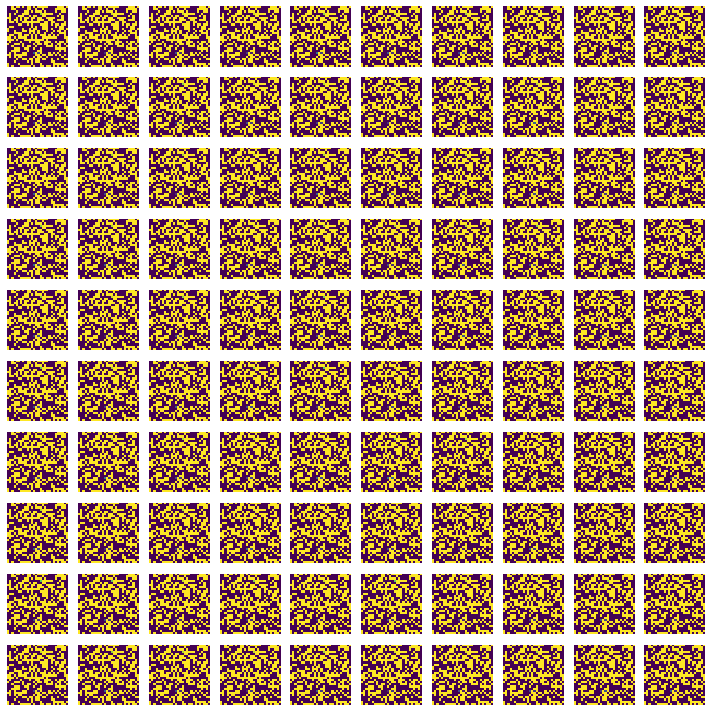

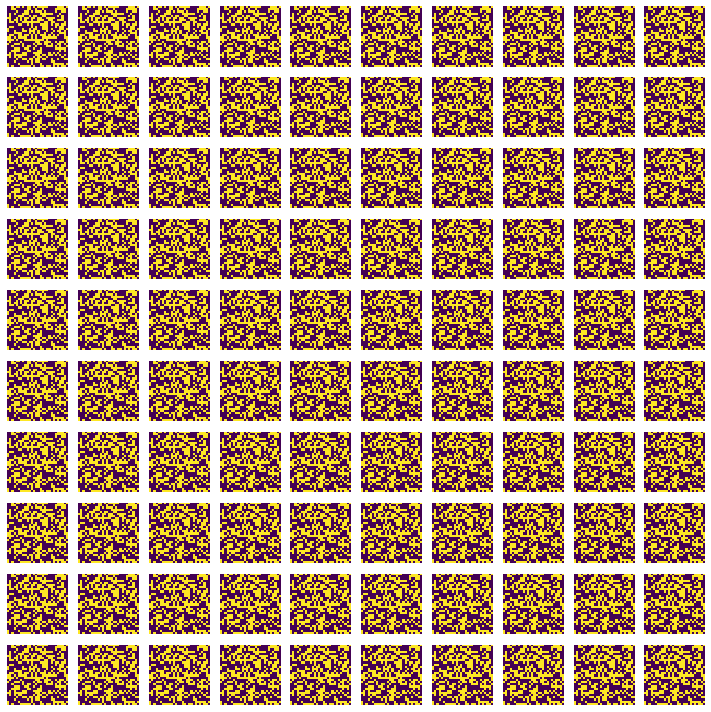

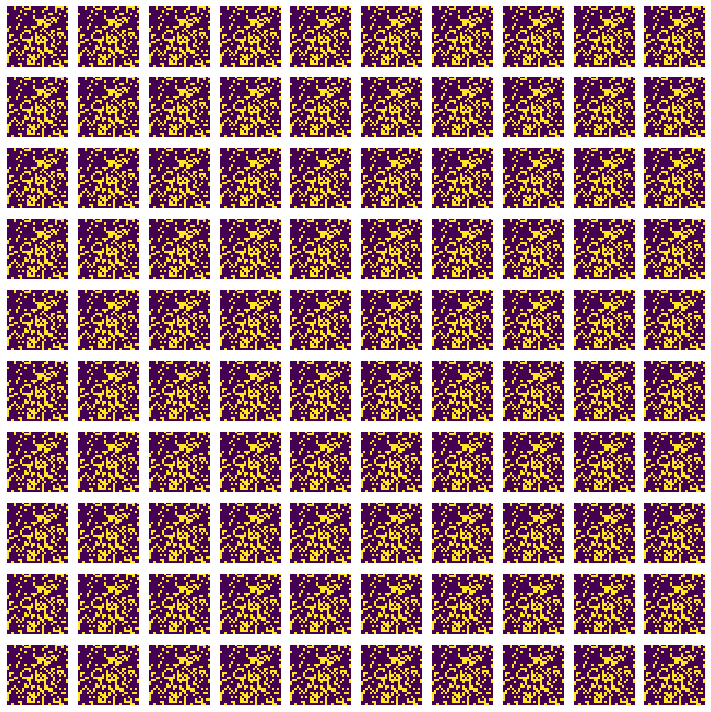

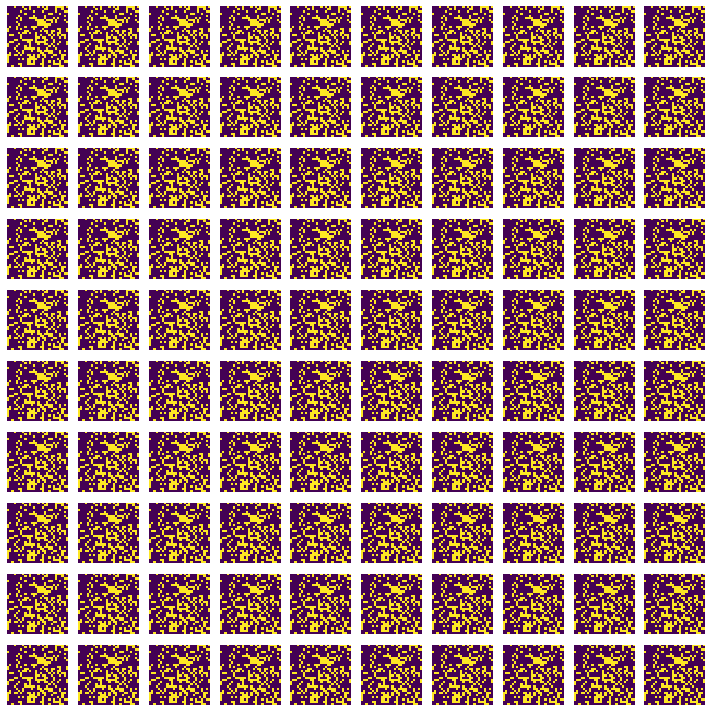

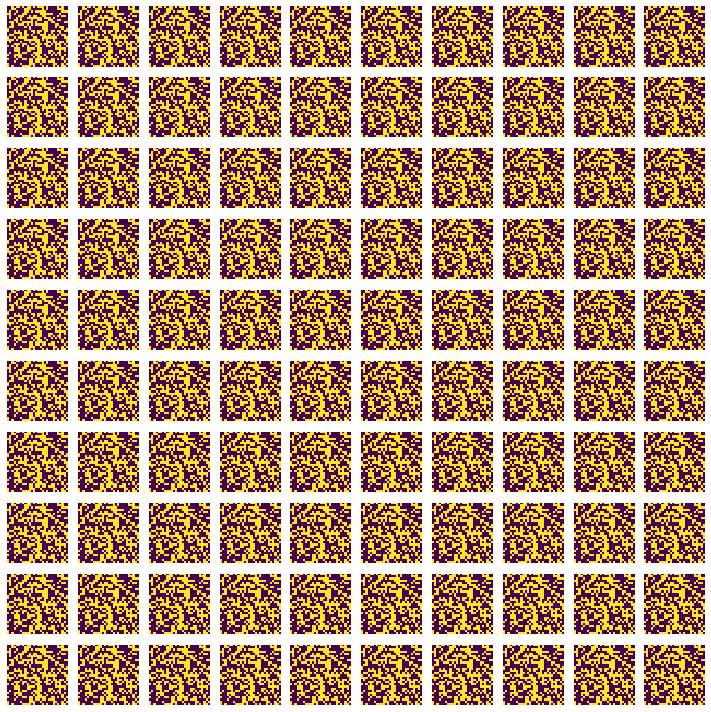

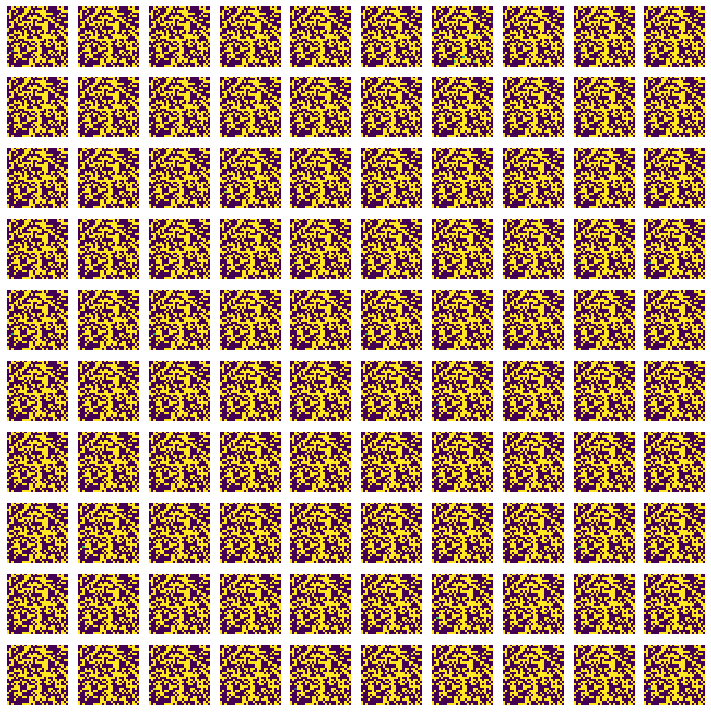

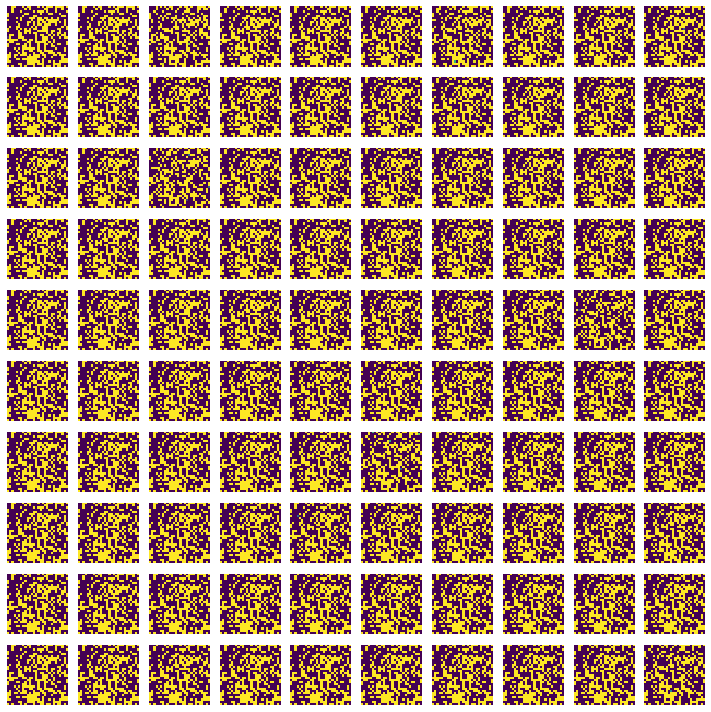

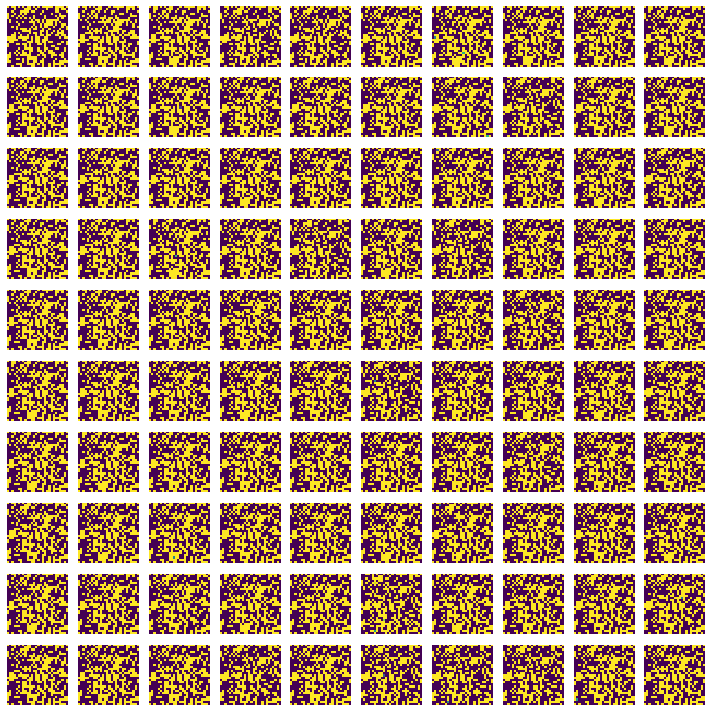

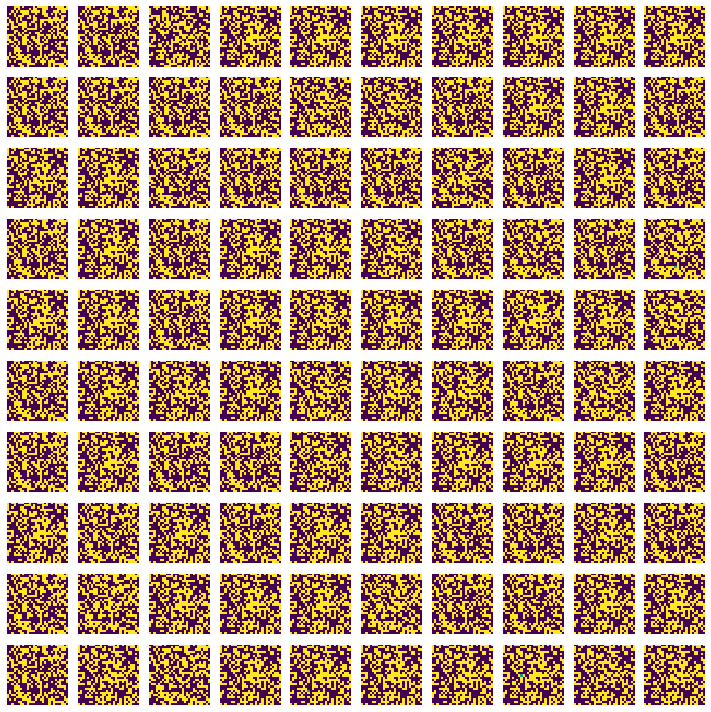

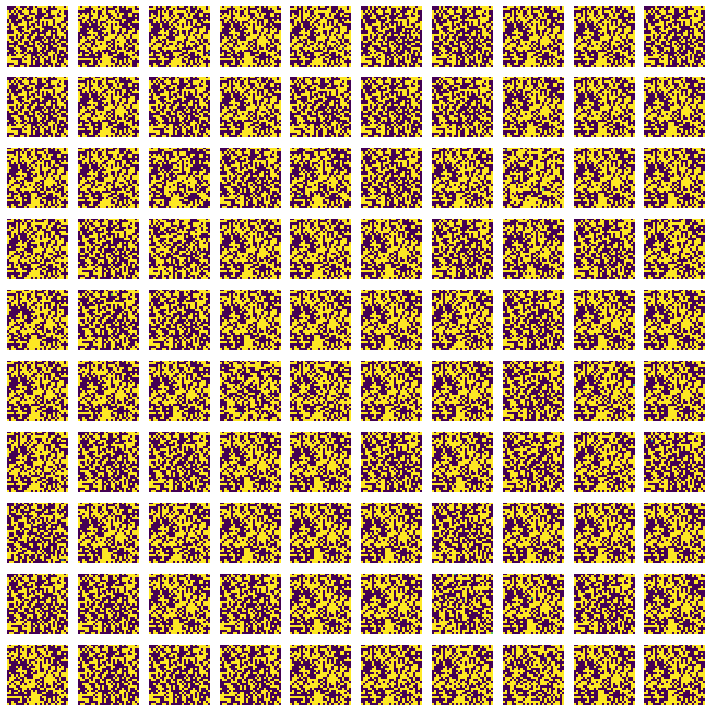

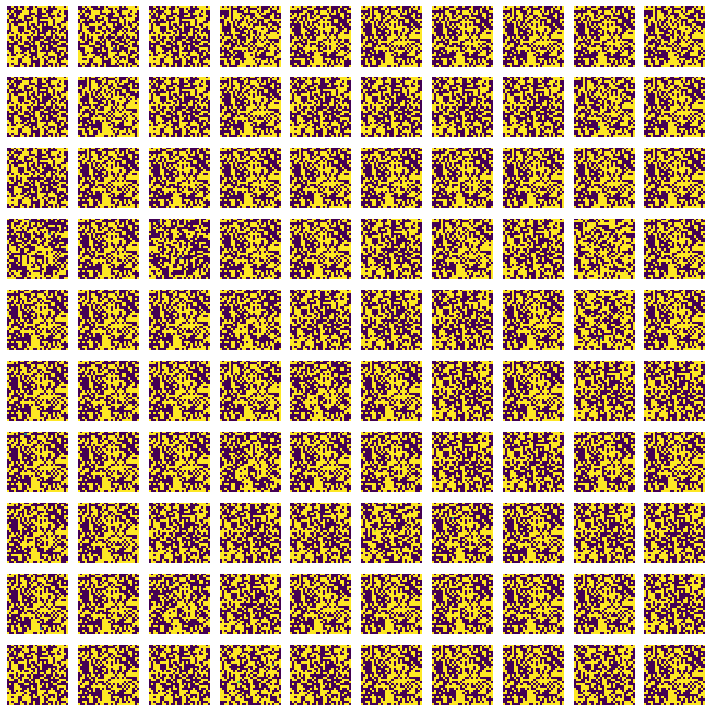

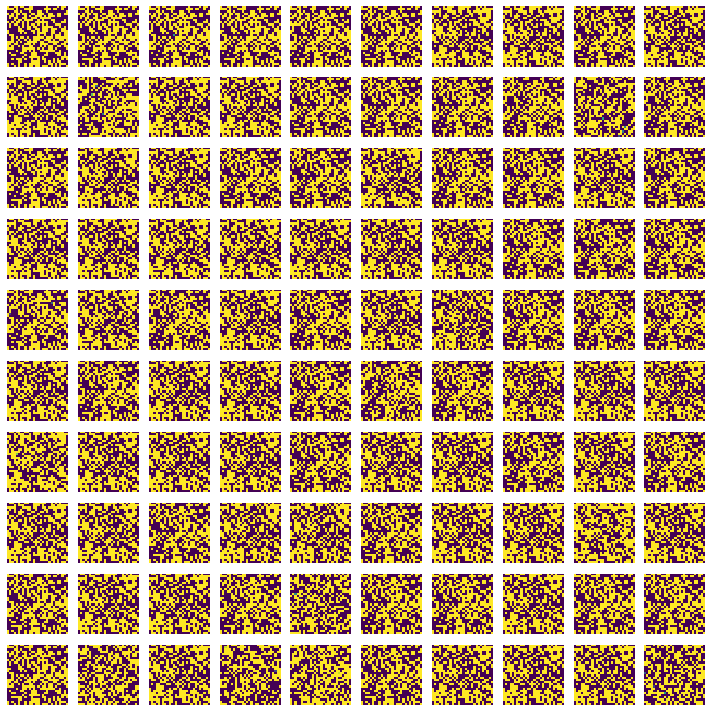

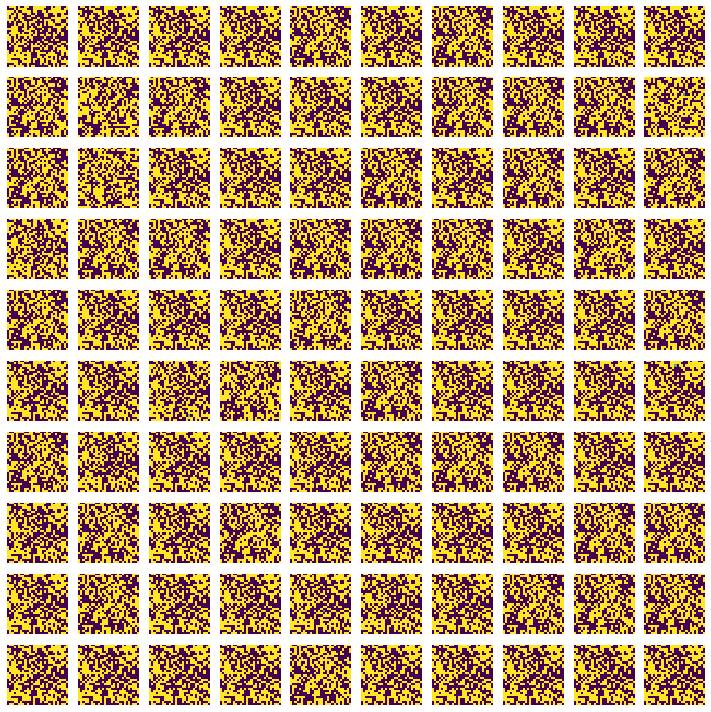

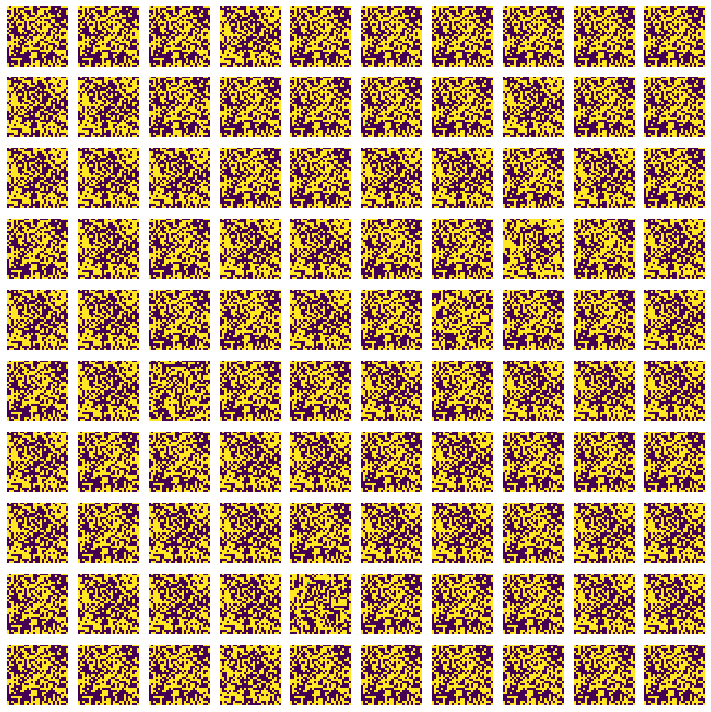

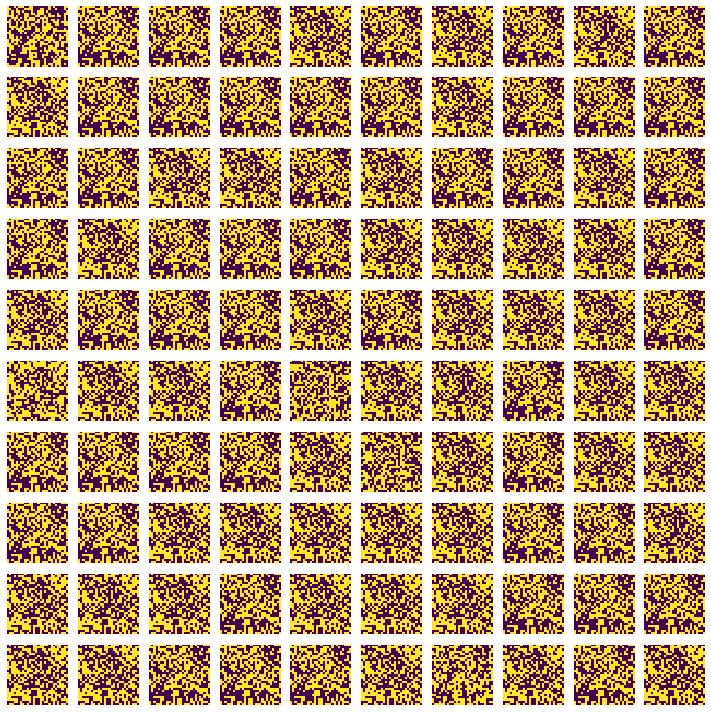

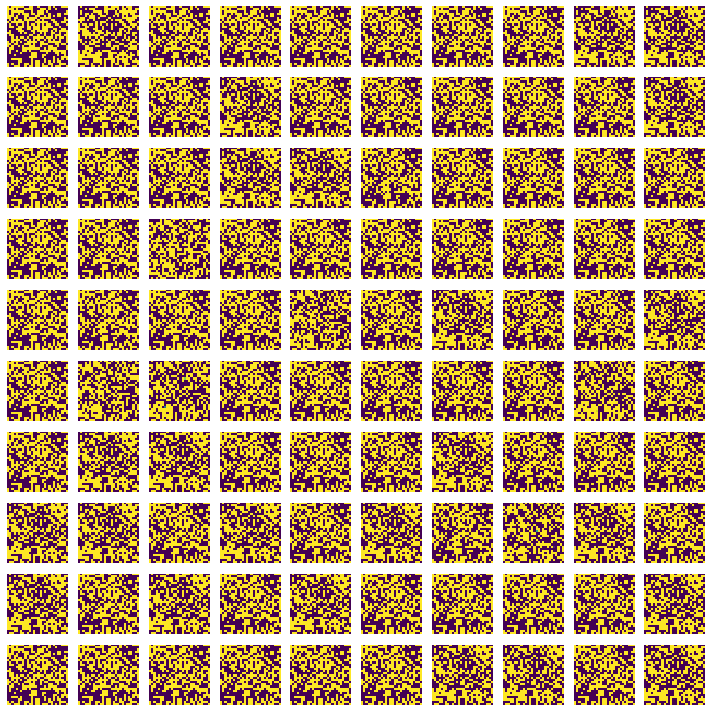

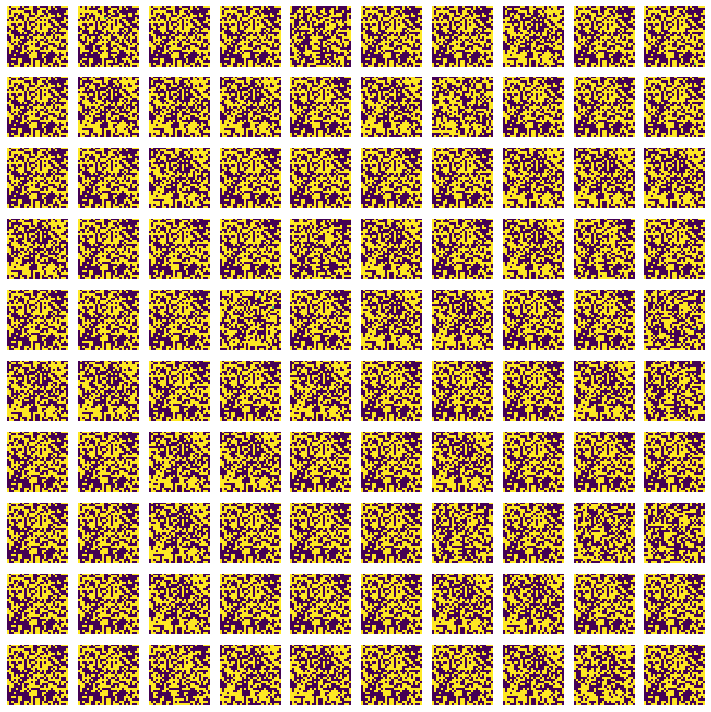

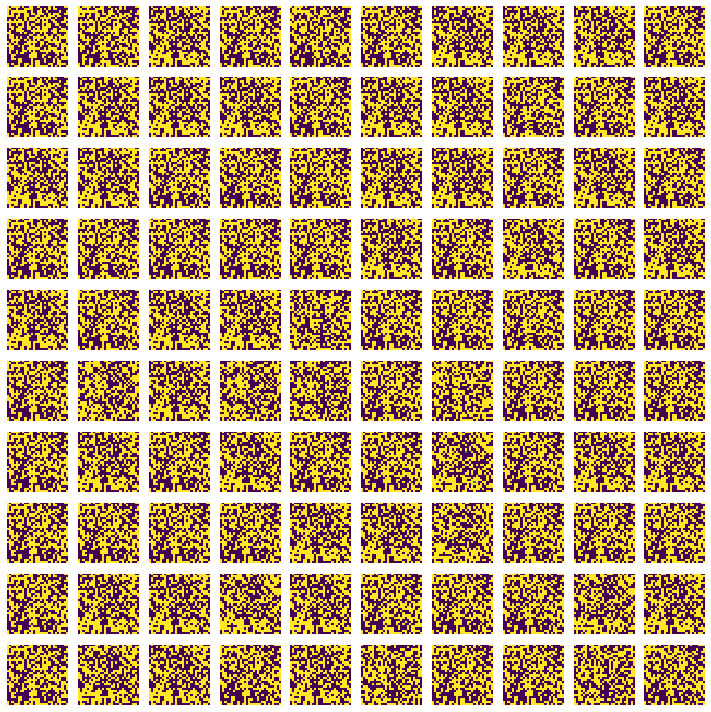

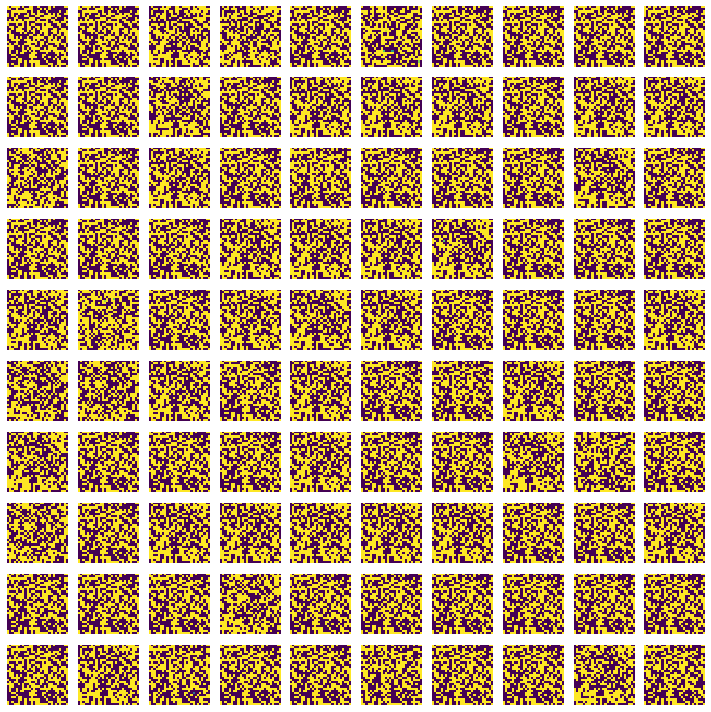

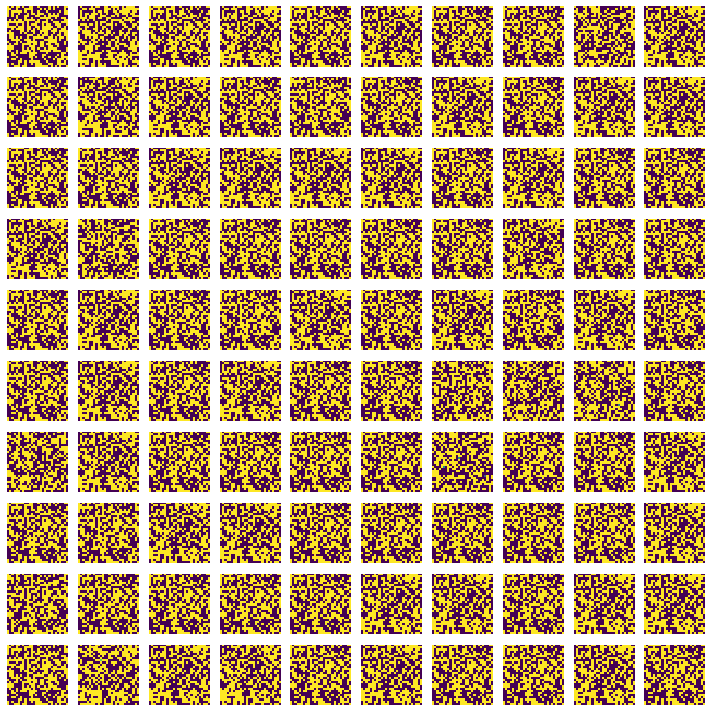

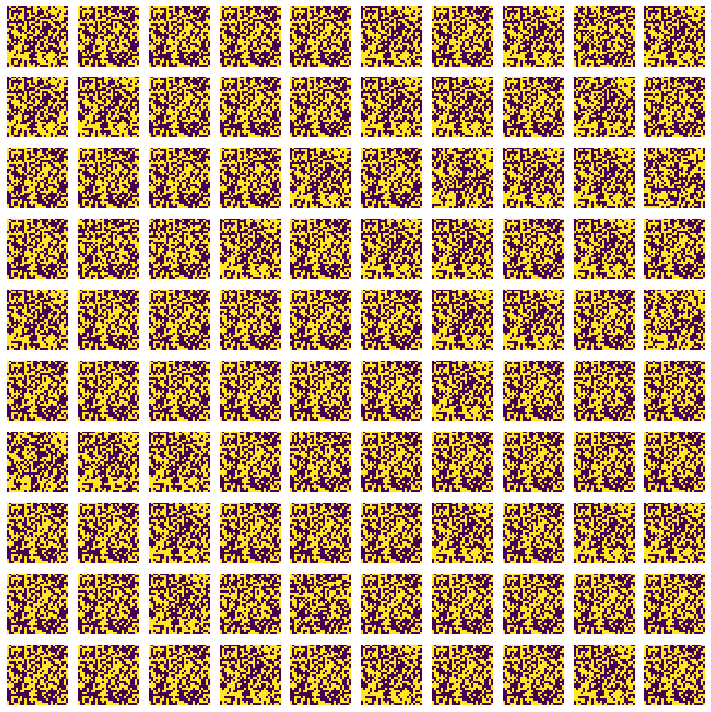

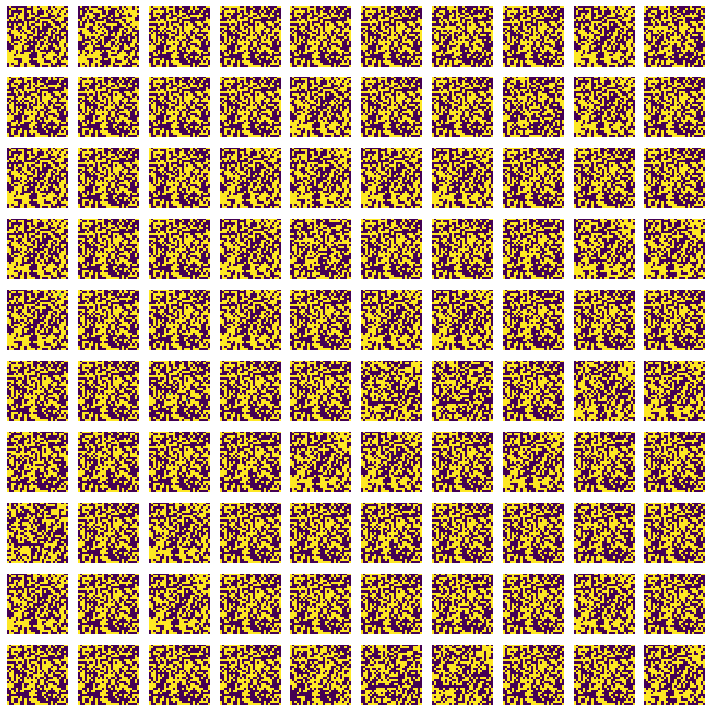

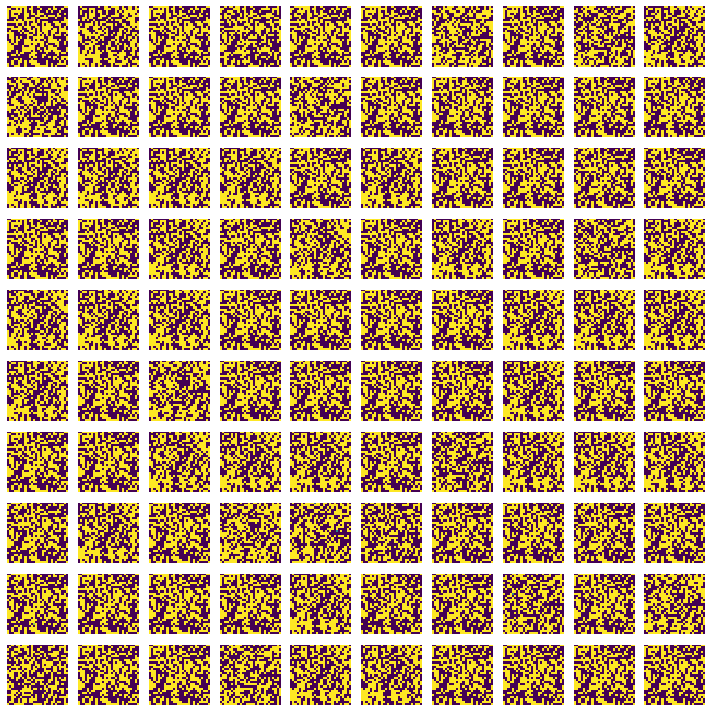

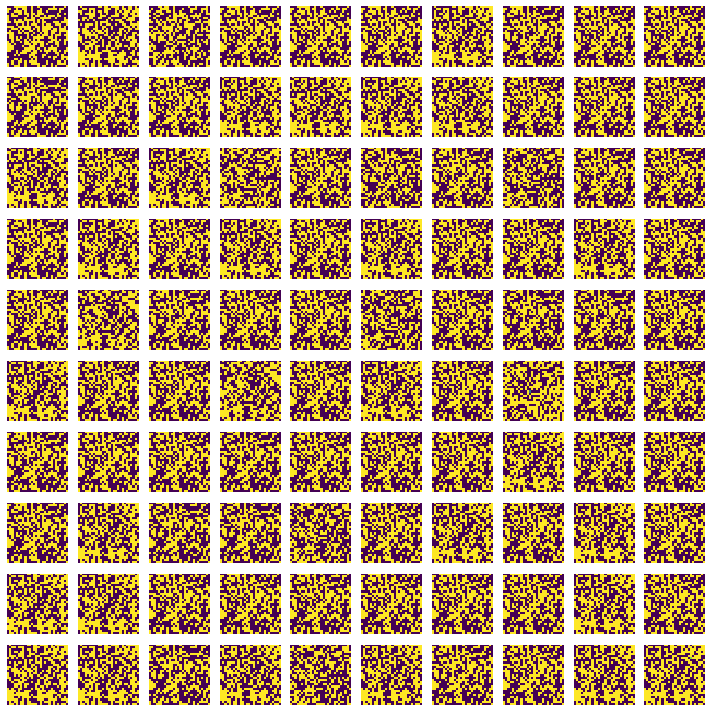

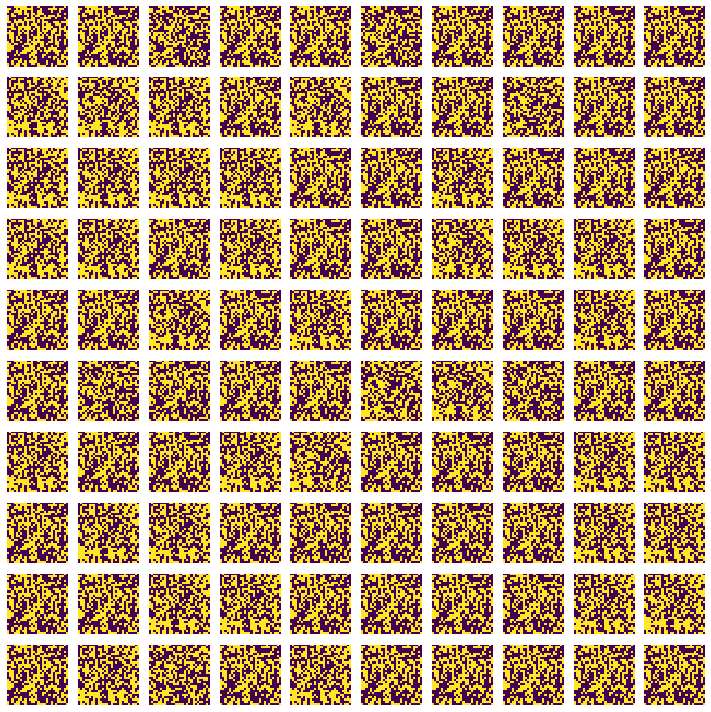

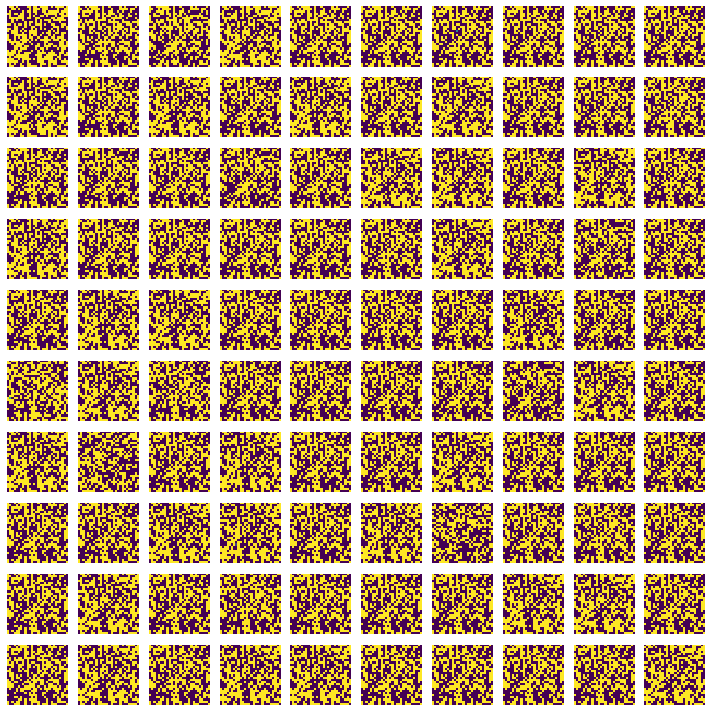

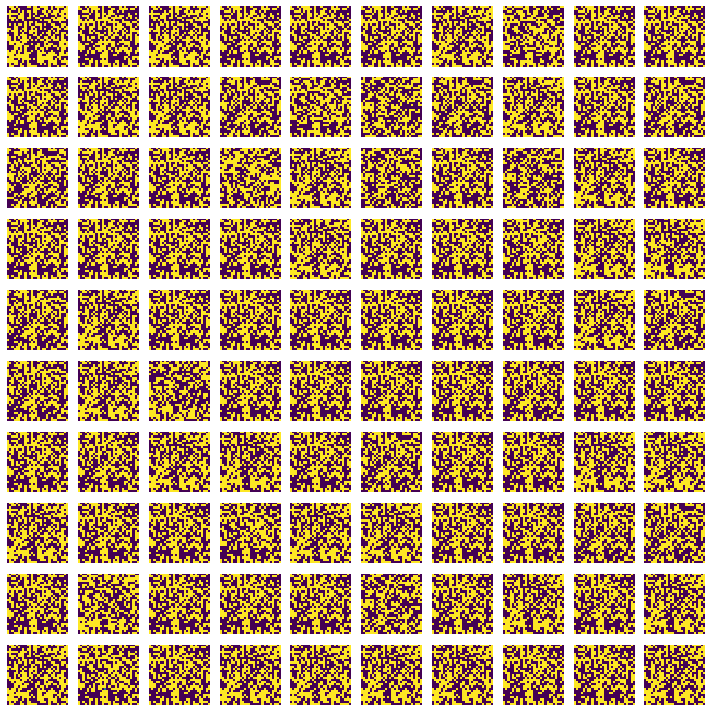

In [12]:
gen_training(500,64)

## Building Model with DCGAN for better output



In [85]:
## Importing Libraries

import glob
import imageio
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
from tensorflow.keras import layers
import time
import tensorflow as tf
from IPython import display

In [86]:
## Loading the dataset

(train_images, train_labels), (_, _) = tf.keras.datasets.mnist.load_data()

In [87]:
#Reshaping and scaling the dataset between [-1,1]
train_images = train_images.reshape(train_images.shape[0], 28, 28, 1).astype('float32')
train_images = (train_images - 127.5) / 127.5 

In [88]:
BUFFER_SIZE = 60000
BATCH_SIZE = 300

# Batch and shuffle the data
train_dataset = tf.data.Dataset.from_tensor_slices(train_images).shuffle(BUFFER_SIZE).batch(BATCH_SIZE)

In [89]:
train_dataset

<BatchDataset shapes: (None, 28, 28, 1), types: tf.float32>

In [90]:
## Creating Generator Model

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D, Activation,BatchNormalization,LeakyReLU,Conv2DTranspose,Reshape
def generator_model():
    model = Sequential()
    model.add(Dense(7*7*256, use_bias=False, input_shape=(100,)))
    model.add(BatchNormalization())
    model.add(LeakyReLU(0.2))
    model.add(Dropout(0.3))

    model.add(Reshape((7, 7, 256)))
    assert model.output_shape == (None, 7, 7, 256) # Note: None is the batch size

    model.add(Conv2DTranspose(128, (5, 5), strides=(1, 1), padding='same', use_bias=False))
    assert model.output_shape == (None, 7, 7, 128)
    model.add(BatchNormalization())
    model.add(LeakyReLU(0.2))
    model.add(Dropout(0.3))

    model.add(Conv2DTranspose(64, (5, 5), strides=(2, 2), padding='same', use_bias=False))
    assert model.output_shape == (None, 14, 14, 64)
    model.add(BatchNormalization())
    model.add(LeakyReLU(0.2))
    model.add(Dropout(0.3))

    model.add(Conv2DTranspose(1, (5, 5), strides=(2, 2), padding='same', use_bias=False, activation='tanh'))
    assert model.output_shape == (None, 28, 28, 1)

    return model

(1, 28, 28, 1)


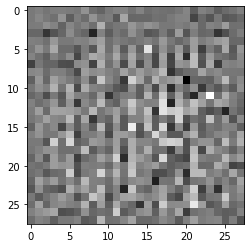

In [91]:
generator = generator_model()

## Adding Random noise 
noise = tf.random.normal([1, 100])
#Generating the with noise
generated_image = generator(noise, training=False)

#Size of the generator
print(generated_image.shape)

#Viewing an image generated by generator
plt.imshow(generated_image[0, :, :, 0], cmap='gray')

In [92]:
## Creating Discriminator

def discriminator_model():
    model = Sequential()
    model.add(Conv2D(64, (5, 5), strides=(2, 2), padding='same',input_shape=[28, 28, 1]))
    model.add(BatchNormalization())
    model.add(LeakyReLU(0.2))
    model.add(Dropout(0.3))

    model.add(Conv2D(128, (5, 5), strides=(2, 2), padding='same'))
    model.add(BatchNormalization())
    model.add(LeakyReLU(0.2))
    model.add(Dropout(0.3))

    model.add(Flatten())
    model.add(Dense(1))

    return model

In [93]:
discriminator = discriminator_model()
#Adding discriminator on generated image
decision = discriminator(generated_image)
print (decision)

tf.Tensor([[0.00024922]], shape=(1, 1), dtype=float32)


In [94]:
## Defining the loss and optimizers
from tensorflow.keras.losses import BinaryCrossentropy
# This method returns a helper function to compute cross entropy loss
cross_entropy = BinaryCrossentropy(from_logits=True)

In [95]:
## Discriminator Losss Function

def discriminator_loss(real_output, fake_output):
    real_loss = cross_entropy(tf.ones_like(real_output), real_output)
    fake_loss = cross_entropy(tf.zeros_like(fake_output), fake_output)
    total_loss = real_loss + fake_loss
    return total_loss

In [96]:
## Generator Loss

def generator_loss(fake_output):
    return cross_entropy(tf.ones_like(fake_output), fake_output)

In [22]:
## Optimizer parameter

from tensorflow.keras.optimizers import Adam
generator_optimizer = Adam(1e-4)
discriminator_optimizer = Adam(1e-4)

In [98]:
## Defining Network paramters

EPOCHS = 50
noise_dim = 100
num_examples_to_generate = 16

# We will reuse this seed overtime (so it's easier)
# to visualize progress in the animated GIF)
seed = tf.random.normal([num_examples_to_generate, noise_dim])

In [99]:
## Training Model

@tf.function
def train_step(images):
    noise = tf.random.normal([BATCH_SIZE, noise_dim])

    with tf.GradientTape() as gen_tape, tf.GradientTape() as disc_tape:
      generated_images = generator(noise, training=True)

      real_output = discriminator(images, training=True)
      fake_output = discriminator(generated_images, training=True)

      gen_loss = generator_loss(fake_output)
      disc_loss = discriminator_loss(real_output, fake_output)

    gradients_of_generator = gen_tape.gradient(gen_loss, generator.trainable_variables)
    gradients_of_discriminator = disc_tape.gradient(disc_loss, discriminator.trainable_variables)

    generator_optimizer.apply_gradients(zip(gradients_of_generator, generator.trainable_variables))
    discriminator_optimizer.apply_gradients(zip(gradients_of_discriminator, discriminator.trainable_variables))

In [100]:
def train(dataset, epochs):
  for epoch in range(epochs):
    start = time.time()

    for image_batch in dataset:
      train_step(image_batch)

    # Produce images for the GIF as we go
    display.clear_output(wait=True)
    generate_and_save_images(generator,epoch + 1,seed)

    # Save the model every 15 epochs
    #if (epoch + 1) % 15 == 0:
      #checkpoint.save(file_prefix = checkpoint_prefix)

    print ('Time for epoch {} is {} sec'.format(epoch + 1, time.time()-start))

  # Generate after the final epoch
  display.clear_output(wait=True)
  generate_and_save_images(generator,epochs,seed)

In [101]:
## Generate and Save the model

def generate_and_save_images(model, epoch, test_input):
  # Notice `training` is set to False.
  # This is so all layers run in inference mode (batchnorm).
  predictions = model(test_input, training=False)

  fig = plt.figure(figsize=(4,4))

  for i in range(predictions.shape[0]):
      plt.subplot(4, 4, i+1)
      plt.imshow(predictions[i, :, :, 0] * 127.5 + 127.5, cmap='gray')
      plt.axis('off')

  plt.savefig('image_at_epoch_{:04d}.png'.format(epoch))
  plt.show()

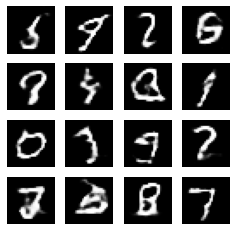

In [27]:
train(train_dataset, EPOCHS)

In [33]:
## Visualise the final output
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%pylab inline
def view_image(epoch):
  path = '/content/image_at_epoch_{:04d}.png'.format(epoch)
  img=mpimg.imread(path)
  imgplot = plt.imshow(img)
  plt.show()

Populating the interactive namespace from numpy and matplotlib


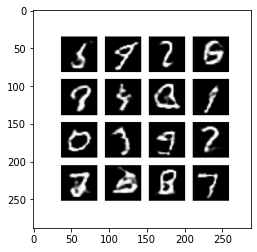

In [35]:
view_image(EPOCHS)

#### Performance Tuning the Model

In [97]:
## Adding Learning Rate in Optimizer
generator_optimizer = Adam(learning_rate=0.0002, beta_1=0.5)
discriminator_optimizer = Adam(learning_rate=0.0002, beta_1=0.5)

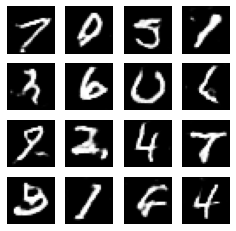

In [61]:
EPOCHS = 70
train(train_dataset, EPOCHS)

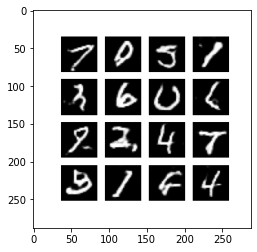

In [62]:
view_image(EPOCHS)

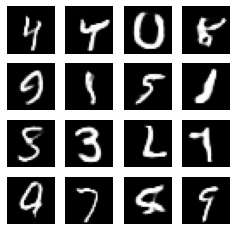

In [83]:
## Changing the default value of LeakyReLU from 0.3 to 0.2 
## Adding Dropout in Generator Model to stop overfitting
## and executing the model tranining
EPOCHS = 70
train(train_dataset, EPOCHS)

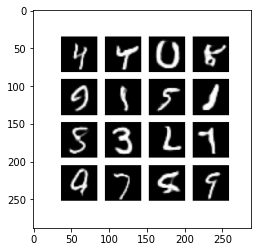

In [84]:
view_image(EPOCHS)

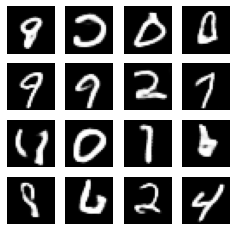

In [102]:
## Adding Batch normalisation in Discriminator Model

EPOCHS = 70
train(train_dataset, EPOCHS)

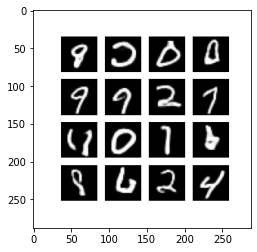

In [103]:
view_image(EPOCHS)

## Conclusion

1. The basic / vanila model will need a lot of Epochs to reach better accuracy.
2. DCGAN uses convolution layer which helps to achive better accuracy in lesser Epoches.
3. In DCGAN by increasing the number of Epochs we can have better accurancy in output. 
4. In DCGAN, using Adam optimizer with learning rate of 0.0002 and momentum 0.5 resulted in better output.
5. In DCGAN, adding Batch normalisation, LeakyReLU with 0.2 as default slope and Dropout Layer to stop overfitting in both Discriminator and Generator model improved the output of model with better accuracy.